In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("oryx_data/totals_by_system.csv")
df

country        origin                                       system  \
0       Russia        Russia  'Orlan-20' ''Kartograf'' reconnaissance UAV   
1       Russia        Russia                'Orlan-20' reconnaissance UAV   
2       Russia        Russia                'Orlan-20' reconnaissance UAV   
3       Russia        Russia                'Orlan-20' reconnaissance UAV   
4       Russia        Russia                              (Unknown) truck   
...        ...           ...                                          ...   
31351  Ukraine  Soviet Union                                      ZiL-157   
31352  Ukraine   Switzerland                    downgraded Mowag Eagle II   
31353  Ukraine     Australia                                          NaN   
31354  Ukraine     Australia                                          NaN   
31355  Ukraine     Australia                                          NaN   

          status                                                url  \
0      destroyed               https://i.postimg.cc/nrJ7kC7g/51.png   
1      destroyed               https://i.postimg.cc/wjfQ6sKd/7j.jpg   
2       captured              https://i.postimg.cc/hPPz5cxF/877.jpg   
3      destroyed              https://i.postimg.cc/tgwcwDnq/544.png   
4      destroyed  https://twitter.com/UAWeapons/status/152156696...   
...          ...                                                ...   
31351   captured  https://i.postimg.cc/W3b21FJ6/2000-zil157-capt...   
31352  destroyed  https://i.postimg.cc/gJ68NVLw/2001-downgraded-...   
31353  destroyed             https://i.postimg.cc/3NDHL10C/3328.png   
31354  destroyed  https://i.postimg.cc/FHCTpggb/2000-bushmaster.jpg   
31355    damaged  https://i.postimg.cc/x8krj1Zk/2000-bushmaster.jpg   

      date_recorded  sysID  imageID  statusID           matID  
0        2022-06-26      1        1         1           7-111  
1        2022-05-06      2        2         1           7-221  
2        2022-05-23      2        3         2           7-232  
3        2022-06-03      2        4         1           7-241  
4        2022-05-05      3        5         1           7-351  
...             ...    ...      ...       ...             ...  
31351    2023-05-12   6686    28655         2  380-6686286552  
31352    2023-08-12   6687    28656         1  380-6687286561  
31353    2022-05-29   4868    28657         1  380-4868286571  
31354    2022-08-19   4868    28658         1  380-4868286581  
31355    2022-08-20   4868    28659         3  380-4868286593  

[31356 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31356 entries, 0 to 31355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        31356 non-null  object
 1   origin         31356 non-null  object
 2   system         31349 non-null  object
 3   status         31356 non-null  object
 4   url            31356 non-null  object
 5   date_recorded  31356 non-null  object
 6   sysID          31356 non-null  int64 
 7   imageID        31356 non-null  int64 
 8   statusID       31356 non-null  int64 
 9   matID          31356 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.4+ MB


Remove the first digit of models

In [4]:
def reformat_system(system):
    parts = str(system).split()
    if parts[0].isdigit():
        return ' '.join(parts[1:])
    return system

df['system'] = df['system'].apply(reformat_system)

In [5]:
df['country'].value_counts()

country
Russia     23057
Ukraine     8299
Name: count, dtype: int64

In [6]:
df['origin'].value_counts()

origin
Soviet Union            14521
Russia                  12339
Ukraine                  2030
United States            1158
Poland                    227
United Kingdom            173
Germany                   148
Netherlands               111
Turkey                    102
Italy                      82
Norway                     81
Canada                     72
France                     55
Sweden                     50
Czech Republic             43
Australia                  30
Belarus                    24
Finland                    18
Yugoslavia                 16
Estonia                     9
South Korea                 9
Denmark                     9
United Arab Emirates        8
Latvia                      8
Israel                      7
Lithuania                   6
Slovakia                    4
Slovenia                    4
Iran                        4
Spain                       2
Cyprus                      2
Romania                     1
Japan                       1
Por

In [7]:
df[df['origin'] == 'Soviet Union']['country'].value_counts()

country
Russia     10643
Ukraine     3878
Name: count, dtype: int64

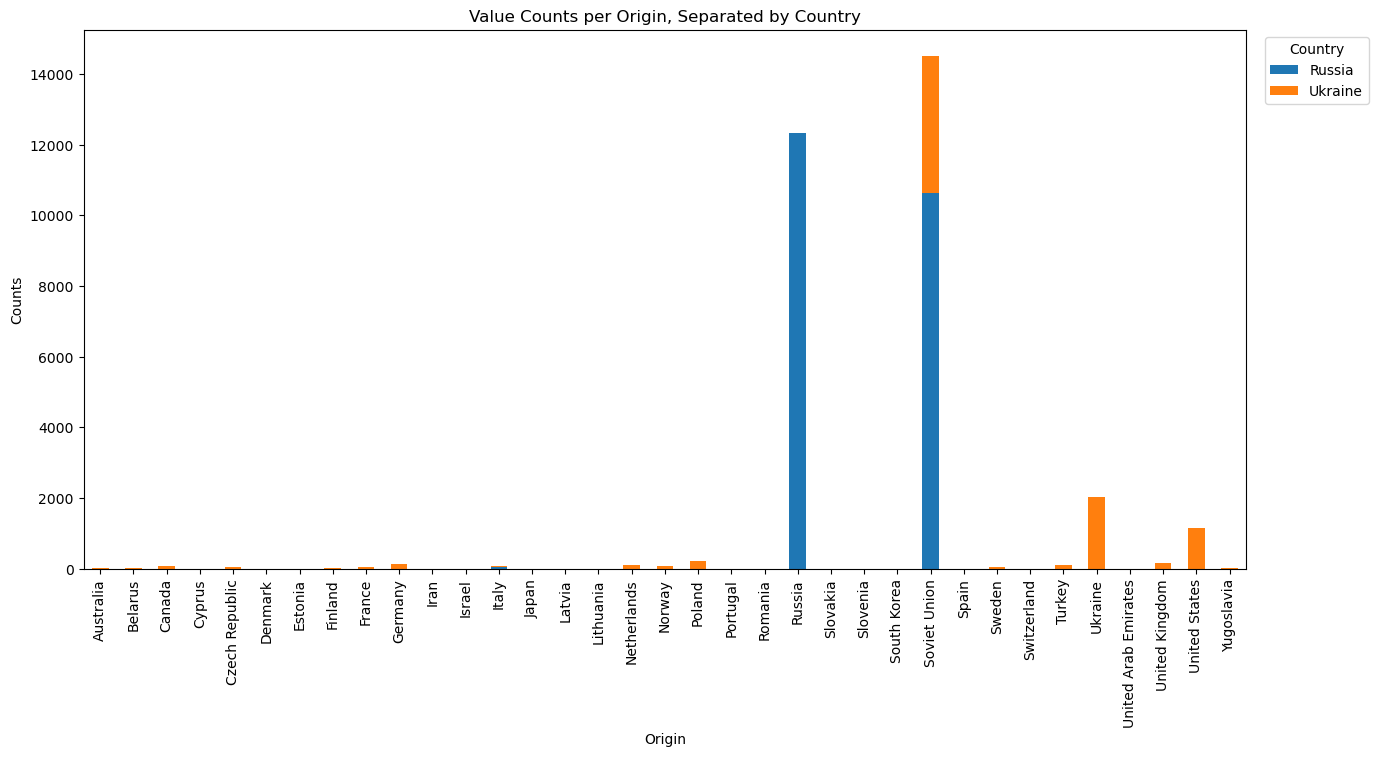

In [8]:
origin_country_counts = df.groupby(['origin', 'country']).size().unstack()
origin_country_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Value Counts per Origin, Separated by Country')
plt.xlabel('Origin')
plt.ylabel('Counts')
plt.legend(title='Country', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

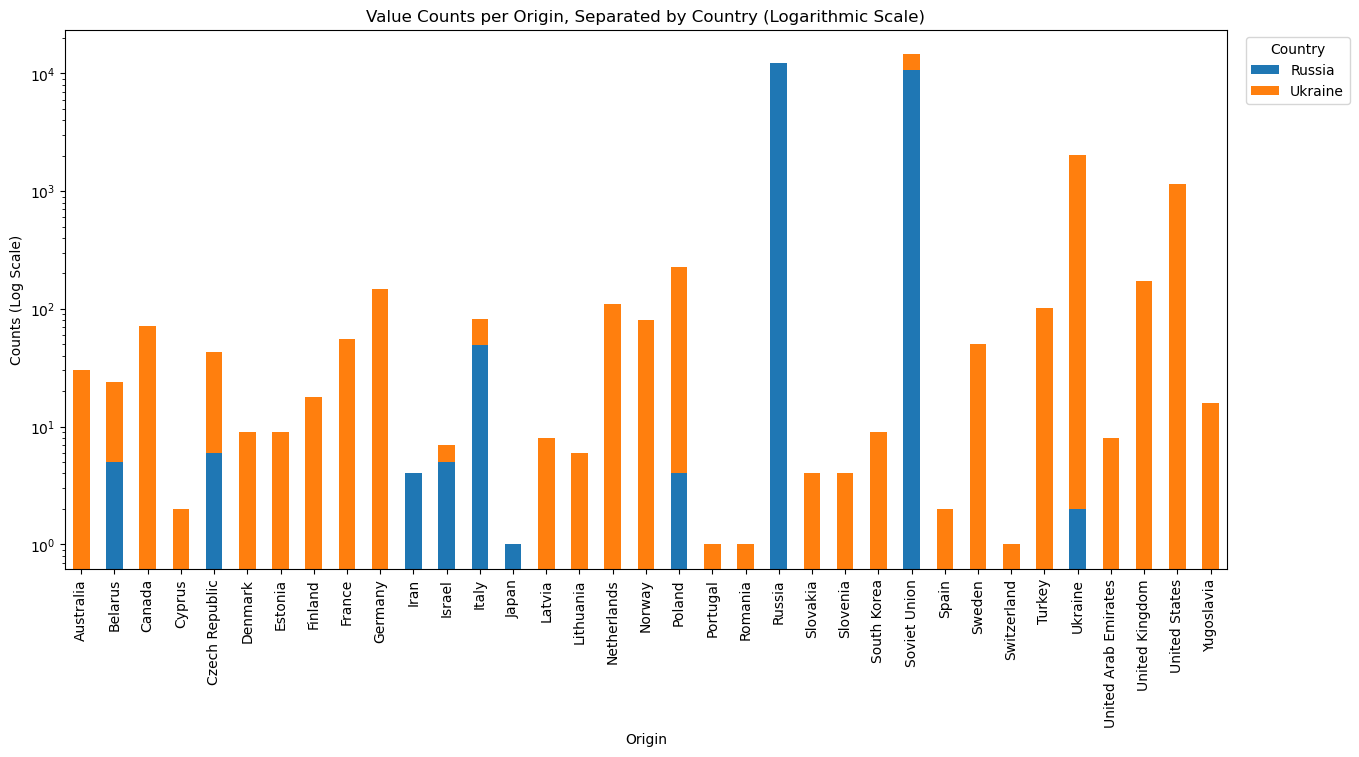

In [9]:
origin_country_counts.plot(kind='bar', stacked=True, figsize=(15, 7), logy=True)
plt.title('Value Counts per Origin, Separated by Country (Logarithmic Scale)')
plt.xlabel('Origin')
plt.ylabel('Counts (Log Scale)')
plt.legend(title='Country', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [10]:
df[df['origin'] == 'Belarus']['country'].value_counts()

country
Ukraine    19
Russia      5
Name: count, dtype: int64

In [11]:
for element in df[df['origin'] == 'Lithuania']['url']:
    print(element)

https://twitter.com/UAWeapons/status/1603738516877344769
https://twitter.com/UAWeapons/status/1603346009798725633
https://twitter.com/aeomiltec/status/1605556115470569472
https://i.postimg.cc/13nggD3m/2002-P-18-ML-early-warning-radar-destr-31-05-24.jpg
https://i.postimg.cc/HLbVzHMF/2009-P-18-ML-early-warning-radar-destr-04-06-24.jpg
https://i.postimg.cc/Kv0jSDqD/2020-P-18-ML-early-warning-radar-dam-10-06-24.jpg


In [12]:
df[df['origin'] == 'Israel']

country  origin                      system     status  \
403     Russia  Israel     Unknown Forpost variant  destroyed   
4024    Russia  Israel  Forpost reconnaissance UAV  destroyed   
5792    Russia  Israel  Forpost reconnaissance UAV  destroyed   
15390   Russia  Israel                     Forpost  destroyed   
15391   Russia  Israel  Forpost reconnaissance UAV  destroyed   
23139  Ukraine  Israel                   GAIA AMIR    damaged   
23248  Ukraine  Israel                  RADA ieMHR  destroyed   

                                                     url date_recorded  sysID  \
403    https://i.postimg.cc/FRXVxNsk/1002-Unknown-For...    2023-07-10    201   
4024   https://twitter.com/UAWeapons/status/154399700...    2022-07-05   1568   
5792                https://i.postimg.cc/RhmxzhXp/d3.png    2022-08-08   2272   
15390             https://i.postimg.cc/FszPwDBL/3270.png    2023-09-07   4649   
15391              https://i.postimg.cc/QMfV9BST/35g.png    2022-03-19   4650   
23139  https://i.postimg.cc/G9wtkV4N/2017-GAIA-AMIR-d...    2024-04-08   4944   
23248  https://i.postimg.cc/pLmT5bGd/2006-RADA-ie-MHR...    2024-07-15   5047   

       imageID  statusID           matID  
403        393         1       7-2013931  
4024      3796         1     7-156837961  
5792      5405         1     7-227254051  
15390    14020         1    7-4649140201  
15391    14021         1    7-4650140211  
23139    20994         3  380-4944209943  
23248    21100         1  380-5047211001

In [13]:
df[df['origin'] == 'Israel']['system'].value_counts()

system
Forpost reconnaissance UAV    3
Unknown Forpost variant       1
Forpost                       1
GAIA AMIR                     1
RADA ieMHR                    1
Name: count, dtype: int64

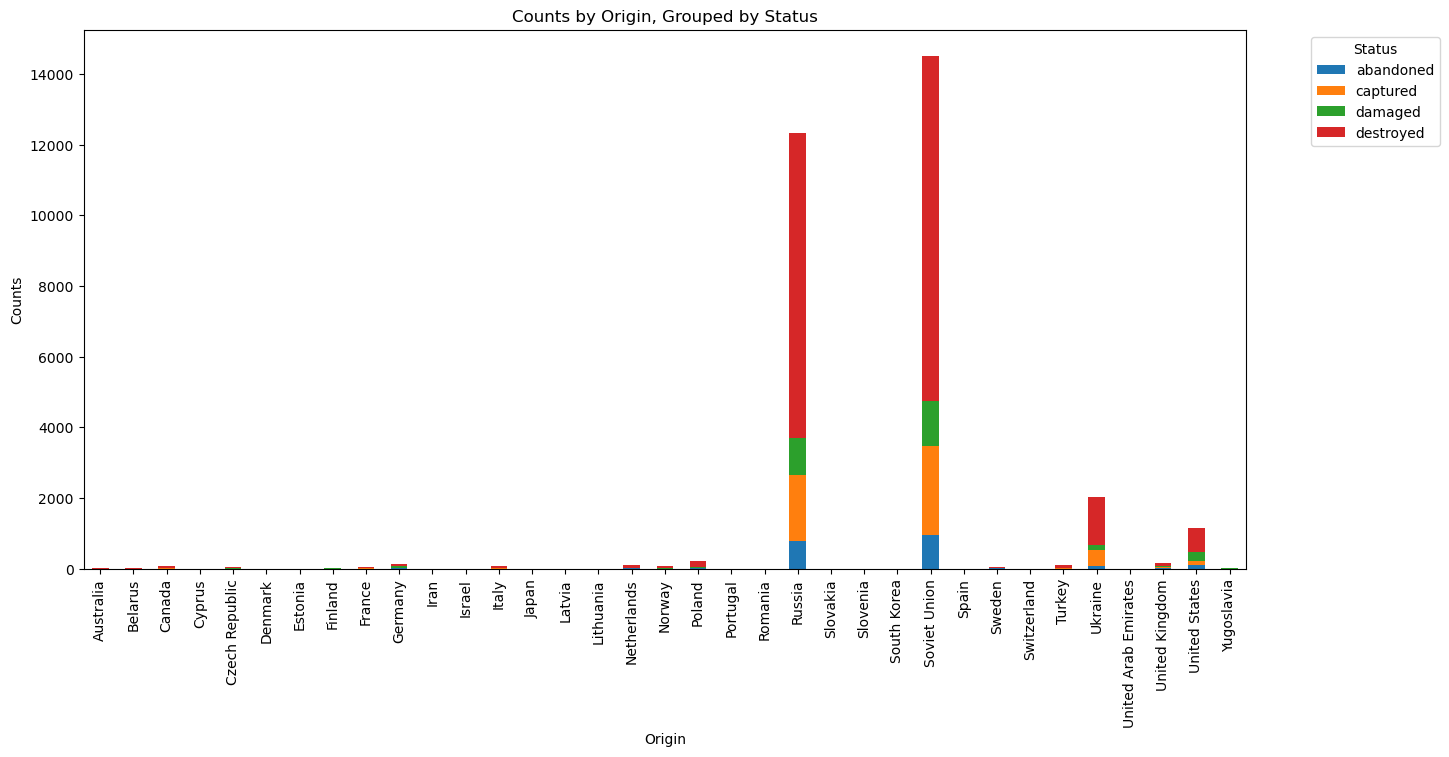

In [14]:
origin_status_counts = df.groupby(['origin', 'status']).size().unstack().fillna(0)

origin_status_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Counts by Origin, Grouped by Status')
plt.xlabel('Origin')
plt.ylabel('Counts')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

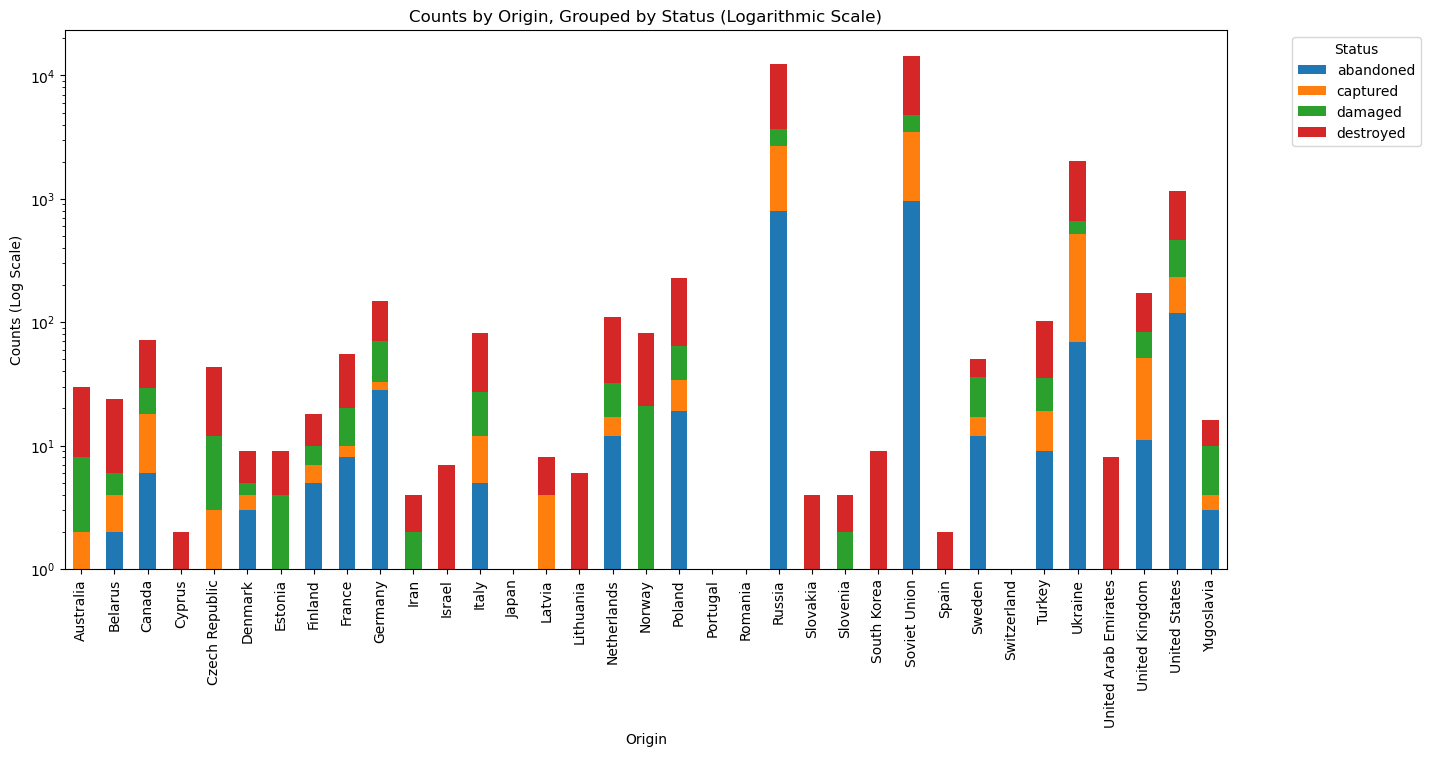

In [15]:
origin_status_counts.plot(kind='bar', stacked=True, figsize=(15, 7), logy=True)
plt.title('Counts by Origin, Grouped by Status (Logarithmic Scale)')
plt.xlabel('Origin')
plt.ylabel('Counts (Log Scale)')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
df[df['origin'] == 'Japan']

country origin                     system     status  \
21009  Russia  Japan  Toyota Hilux pickup truck  destroyed   

                                        url date_recorded  sysID  imageID  \
21009  https://i.postimg.cc/XY7zvhsb/6k.png    2022-06-29   4804    19049   

       statusID         matID  
21009         1  7-4804190491

In [17]:
df[df['origin'] == 'Portugal']

country    origin       system     status  \
30466  Ukraine  Portugal  Tekever AR3  destroyed   

                                         url date_recorded  sysID  imageID  \
30466  https://i.postimg.cc/V6BFMv9d/354.png    2023-08-29   6657    27828   

       statusID           matID  
30466         1  380-6657278281

In [18]:
df[df['origin'] == 'United Arab Emirates']

country                origin         system     status  \
23228  Ukraine  United Arab Emirates    Panthera T6   captured   
24577  Ukraine  United Arab Emirates    Panthera T6  destroyed   
25019  Ukraine  United Arab Emirates    Panthera T6  destroyed   
25343  Ukraine  United Arab Emirates    Panthera T6  destroyed   
28110  Ukraine  United Arab Emirates  INKAS Titan-S  destroyed   
28111  Ukraine  United Arab Emirates  INKAS Titan-S  destroyed   
28112  Ukraine  United Arab Emirates  INKAS Titan-S  destroyed   
28113  Ukraine  United Arab Emirates  INKAS Titan-S  destroyed   

                                                     url date_recorded  sysID  \
23228  https://twitter.com/UAWeapons/status/163234751...    2023-03-07   5028   
24577  https://i.postimg.cc/GpZggCbt/2009-Panthera-T6...    2023-05-17   5568   
25019  https://i.postimg.cc/dDMbxZRQ/2017-Panthera-T6...    2023-07-09   5830   
25343  https://i.postimg.cc/FHjP81g8/2034-Panthera-T6...    2024-09-26   5985   
28110  https://i.postimg.cc/vBg9T1dV/2005-INKAS-Titan...    2023-03-20   6535   
28111  https://i.postimg.cc/CK2bGP5T/2003-Titan-S-des...    2023-08-12   6535   
28112  https://i.postimg.cc/15gK1vxf/2001-Inkas-Titan...    2024-08-18   6535   
28113  https://i.postimg.cc/Kv7tjLyZ/2029-Inkas-Titan...    2024-09-13   6535   

       imageID  statusID           matID  
23228    21081         2  380-5028210812  
24577    22375         1  380-5568223751  
25019    22799         1  380-5830227991  
25343    23106         1  380-5985231061  
28110    25681         1  380-6535256811  
28111    25682         1  380-6535256821  
28112    25683         1  380-6535256831  
28113    25684         1  380-6535256841

In [19]:
origin_status_counts

status                abandoned  captured  damaged  destroyed
origin                                                       
Australia                   1.0       1.0      6.0       22.0
Belarus                     2.0       2.0      2.0       18.0
Canada                      6.0      12.0     11.0       43.0
Cyprus                      0.0       0.0      0.0        2.0
Czech Republic              1.0       2.0      9.0       31.0
Denmark                     3.0       1.0      1.0        4.0
Estonia                     0.0       1.0      3.0        5.0
Finland                     5.0       2.0      3.0        8.0
France                      8.0       2.0     10.0       35.0
Germany                    28.0       5.0     38.0       77.0
Iran                        0.0       1.0      1.0        2.0
Israel                      0.0       0.0      1.0        6.0
Italy                       5.0       7.0     15.0       55.0
Japan                       0.0       0.0      0.0        1.0
Latvia                      0.0       4.0      0.0        4.0
Lithuania                   0.0       0.0      1.0        5.0
Netherlands                12.0       5.0     15.0       79.0
Norway                      0.0       0.0     21.0       60.0
Poland                     19.0      15.0     30.0      163.0
Portugal                    0.0       0.0      0.0        1.0
Romania                     0.0       0.0      0.0        1.0
Russia                    801.0    1856.0   1043.0     8639.0
Slovakia                    0.0       0.0      1.0        3.0
Slovenia                    0.0       0.0      2.0        2.0
South Korea                 0.0       0.0      0.0        9.0
Soviet Union              961.0    2509.0   1277.0     9774.0
Spain                       0.0       0.0      0.0        2.0
Sweden                     12.0       5.0     19.0       14.0
Switzerland                 0.0       0.0      0.0        1.0
Turkey                      9.0      10.0     16.0       67.0
Ukraine                    69.0     451.0    143.0     1367.0
United Arab Emirates        0.0       1.0      0.0        7.0
United Kingdom             11.0      40.0     33.0       89.0
United States             119.0     112.0    233.0      694.0
Yugoslavia                  3.0       1.0      6.0        6.0

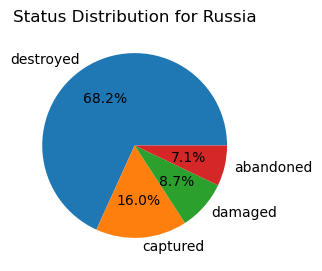

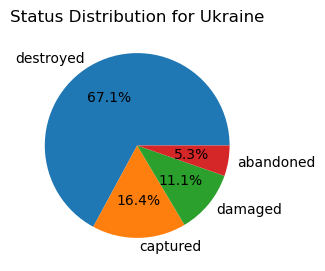

In [20]:
for country in df['country'].unique():
    country_data = df[df['country'] == country]['status'].value_counts()
    country_data.plot(kind='pie', autopct='%1.1f%%', figsize=(3, 3), title=f'Status Distribution for {country}')
    plt.ylabel('')
    plt.show()

In [21]:
df_date = df.copy()
df_date.index = pd.to_datetime(df['date_recorded'])
df_date = df_date.sort_index()
df_date = df_date.fillna(0)

# Initial invasion (24 February – 7 April 2022)
fighting focused away from the north and towards the south and east of Ukraine.

2 April, the Russians's made a "goodwill gesture" and retreated from northern Ukraine. By the 7th retreat was complete.

Strategic Objective: Use overhwelming surprise attack to decapitate Ukrainian leadership and return it to Russia's sphere of influence Result: Failed

# Southeastern front, Russian Donbass Offensive (8 April – 28 August 2022)
the area of heavy fighting shifted to the south and east of Ukraine

Strategic Objective: Leverage Russia's military advantages to seize the all of Luhansk and Donetsk oblasts
Result: Failed, though tactical success was attained by breaking through Popasna and seizing Sieverodonetsk, Lysychansk, and Lyman.

# 2022 Ukrainian Kharkiv/Kherson Offensives (29 August – 11 November 2022)
Starting in October, Russia began a campaign of massive strikes against Ukrainian infrastructure.

Strategic Objective: Push Russia as far as possible from Kharkhiv (Ukraine's second largest city), eliminate risk to Luhansk and Donetsk oblasts, and liberate Kherson city
Result: Suceeded, though at questionable cost with regards to Kherson.

# Second stalemate (12 November 2022 – 7 June 2023)
Russia continued its strikes against Ukrainian infrastructure while the battle of Bakhmut escalated.

Strategic Objective: Attack Ukraine across the front to pin down Ukrainian forces and claim the territories of formally annexed Luhansk, Donetsk, Zaporizhia, and Kherson oblasts.
Result: Failed, though Russia did stabilize the Svatove-Kremina line and seized Bahkmut.

# 2023 Ukrainian counteroffensive (8 June 2023 – 30 November 2023)
when the 2023 Ukrainian counteroffensive began, to 31 August 2023.

Strategic Objective: Eliminate or make unfeasible Russia's land bridge to Crimea

# 2023–2024 winter campaigns (1 December 2023 – 23 April 2024)
This period was characterized by an increased reliance on drones and missiles amid an increasing shortage of Ukrainian artillery ammunition and tanks.

Strategic Objective: Reclaim territory in the Donbas (Donetsk and Luhansk oblasts)

# 2024 spring and summer campaigns (24 April 2024 – 31 July 2024)

24 April president Biden signed into law the aid package for Ukraine

# 2024 Kursk offensive (6 August 2024 – present)



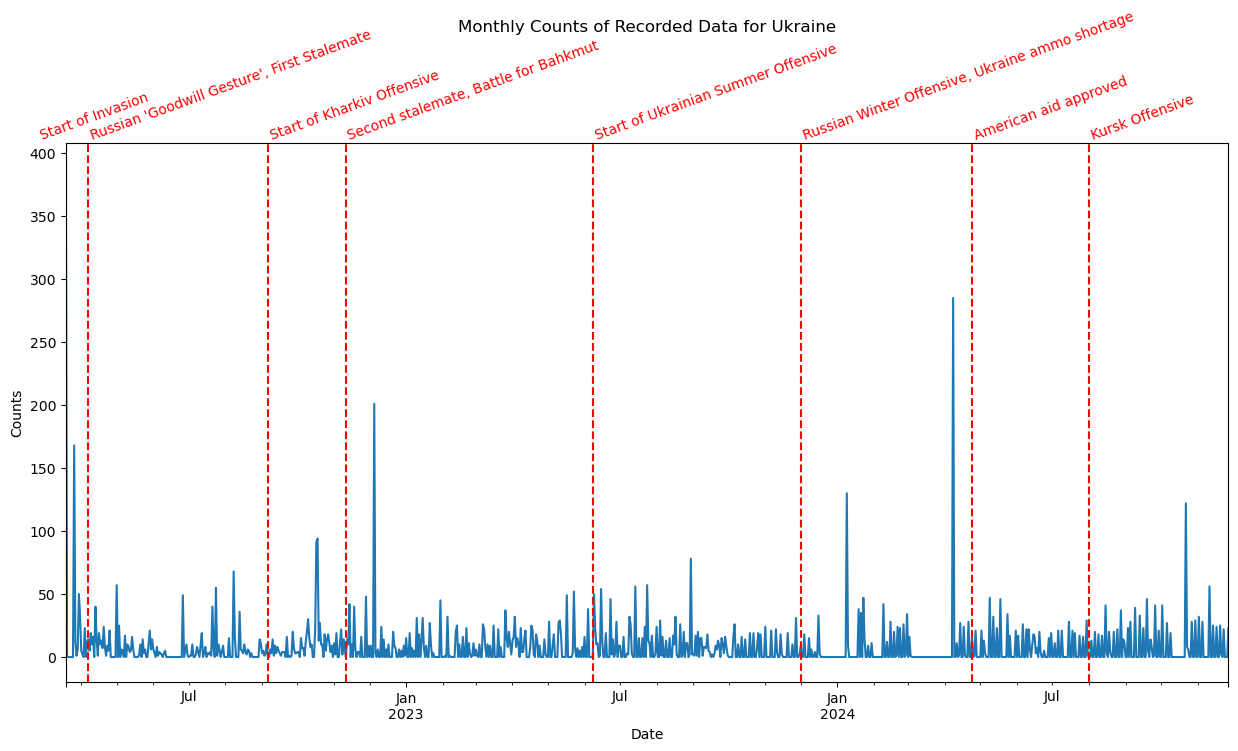

In [22]:
# Define important dates and their labels
important_dates = {
    '2022-02-24': 'Start of Invasion',
    '2022-04-07': "Russian 'Goodwill Gesture', First Stalemate",
    '2022-09-06': 'Start of Kharkiv Offensive',
    '2022-11-11': 'Second stalemate, Battle for Bahkmut',
    '2023-06-08': 'Start of Ukrainian Summer Offensive',
    '2023-12-01': 'Russian Winter Offensive, Ukraine ammo shortage',
    '2024-04-24': 'American aid approved',
    '2024-08-01': 'Kursk Offensive',
}

df_date[df_date['country'] == 'Ukraine']['country'].resample('D').count().plot(kind='line', figsize=(15, 7))
plt.title('Monthly Counts of Recorded Data for Ukraine', pad=80)
plt.xlabel('Date')
plt.ylabel('Counts')

# Add vertical lines and labels for important dates
def add_date_labels():
    for date, label in important_dates.items():
        plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
        plt.text(pd.to_datetime(date), plt.ylim()[1], label, rotation=20, verticalalignment='bottom', color='red')

add_date_labels()

plt.show()

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/292513028.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date[df_date['country'] == 'Ukraine']['country'].resample('M').count().plot(kind='bar', figsize=(12, 6))


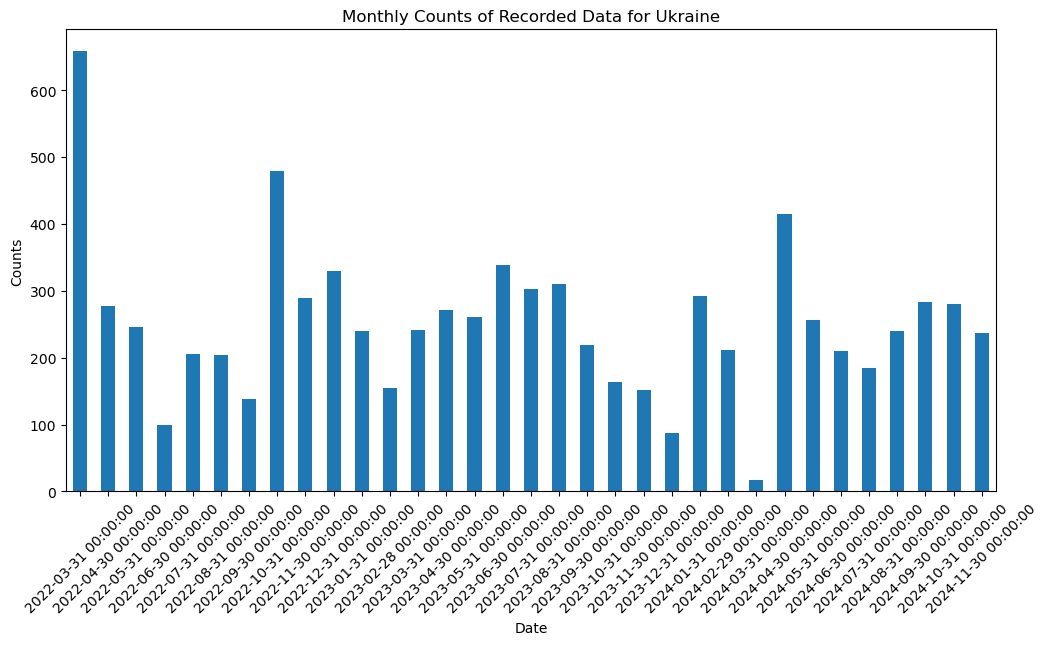

In [23]:
df_date[df_date['country'] == 'Ukraine']['country'].resample('M').count().plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Counts of Recorded Data for Ukraine')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.show()

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/2570601025.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_date[df_date['country'] == 'Ukraine']['country'].resample('Q').count().plot(kind='bar', figsize=(15, 7))


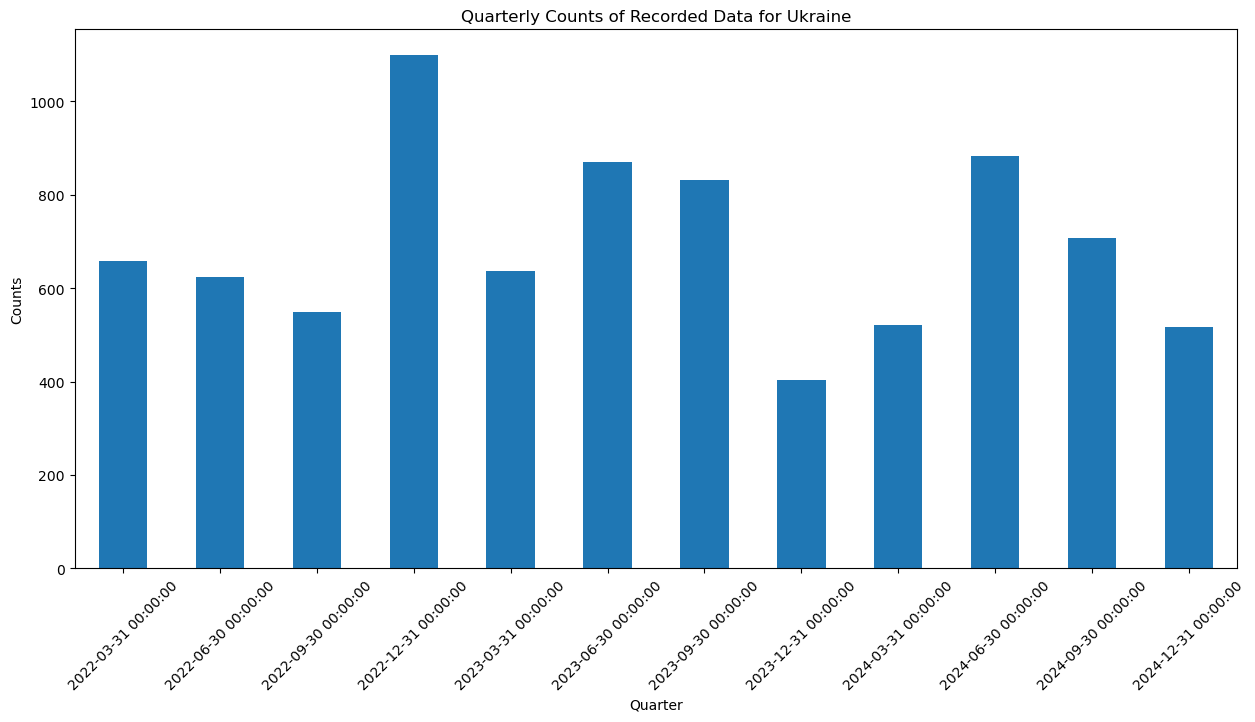

In [24]:
df_date[df_date['country'] == 'Ukraine']['country'].resample('Q').count().plot(kind='bar', figsize=(15, 7))
plt.title('Quarterly Counts of Recorded Data for Ukraine')
plt.xlabel('Quarter')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/1929307869.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start=df3_cumulative_ukraine.index.min(), end=df3_cumulative_ukraine.index.max(), freq='M'), rotation=45)


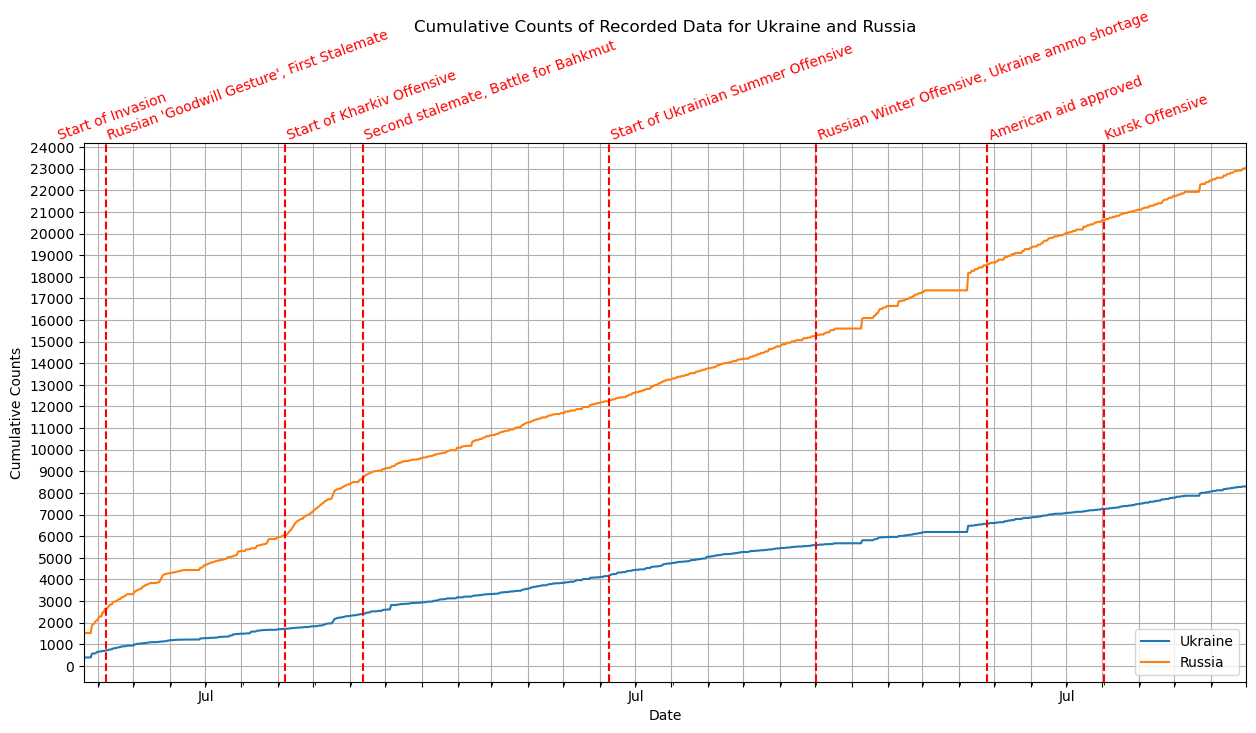

In [25]:
df3_cumulative_ukraine = df_date[df_date == 'Ukraine']['country'].resample('D').count().cumsum()
df3_cumulative_russia = df_date[df_date == 'Russia']['country'].resample('D').count().cumsum()

df3_cumulative_ukraine.plot(kind='line', figsize=(15, 7), label='Ukraine')
df3_cumulative_russia.plot(kind='line', figsize=(15, 7), label='Russia')
plt.title('Cumulative Counts of Recorded Data for Ukraine and Russia', pad=80)
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend()
plt.yticks(np.arange(0, df3_cumulative_russia.max() + 1000, 1000))
plt.grid(True)

plt.xticks(pd.date_range(start=df3_cumulative_ukraine.index.min(), end=df3_cumulative_ukraine.index.max(), freq='M'), rotation=45)

add_date_labels()

plt.show()

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/706468348.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start=ratio.index.min(), end=ratio.index.max(), freq='M'), rotation=45)


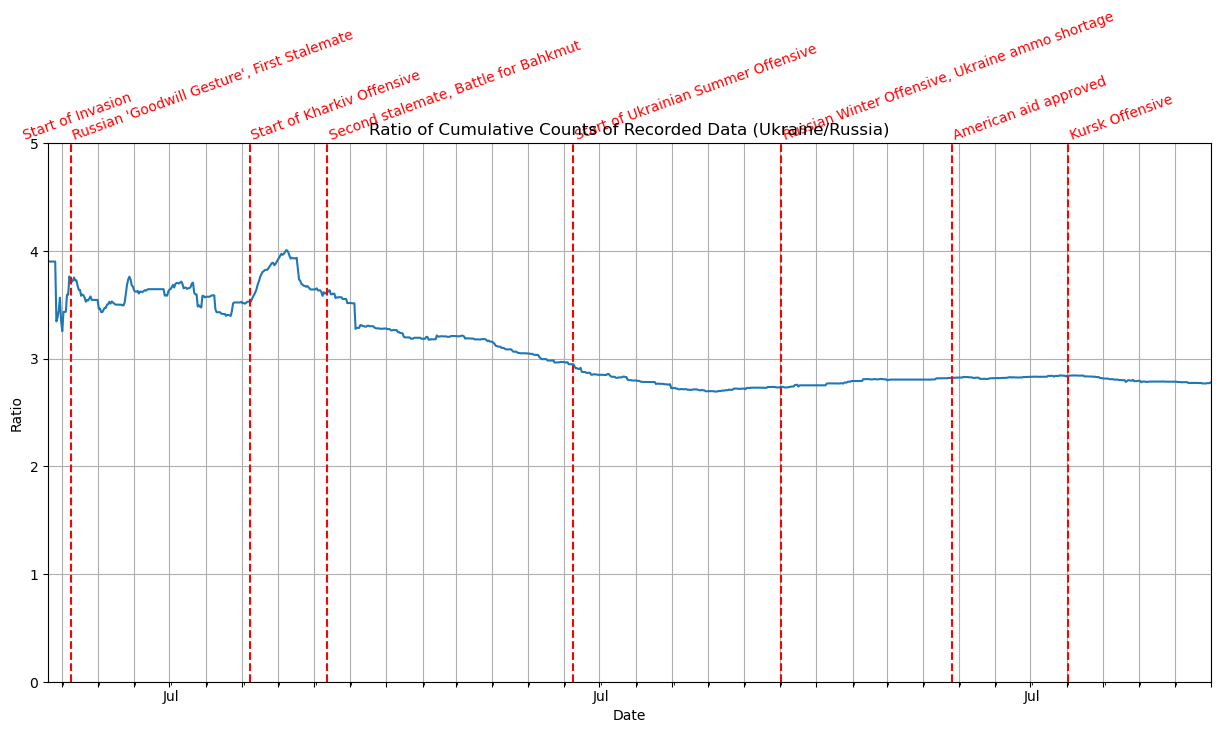

In [26]:
ratio = df3_cumulative_russia / df3_cumulative_ukraine

ratio.plot(kind='line', figsize=(15, 7))
plt.title('Ratio of Cumulative Counts of Recorded Data (Ukraine/Russia)')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.ylim(0, 5)
plt.grid(True)

plt.xticks(pd.date_range(start=ratio.index.min(), end=ratio.index.max(), freq='M'), rotation=45)

add_date_labels()

plt.show()

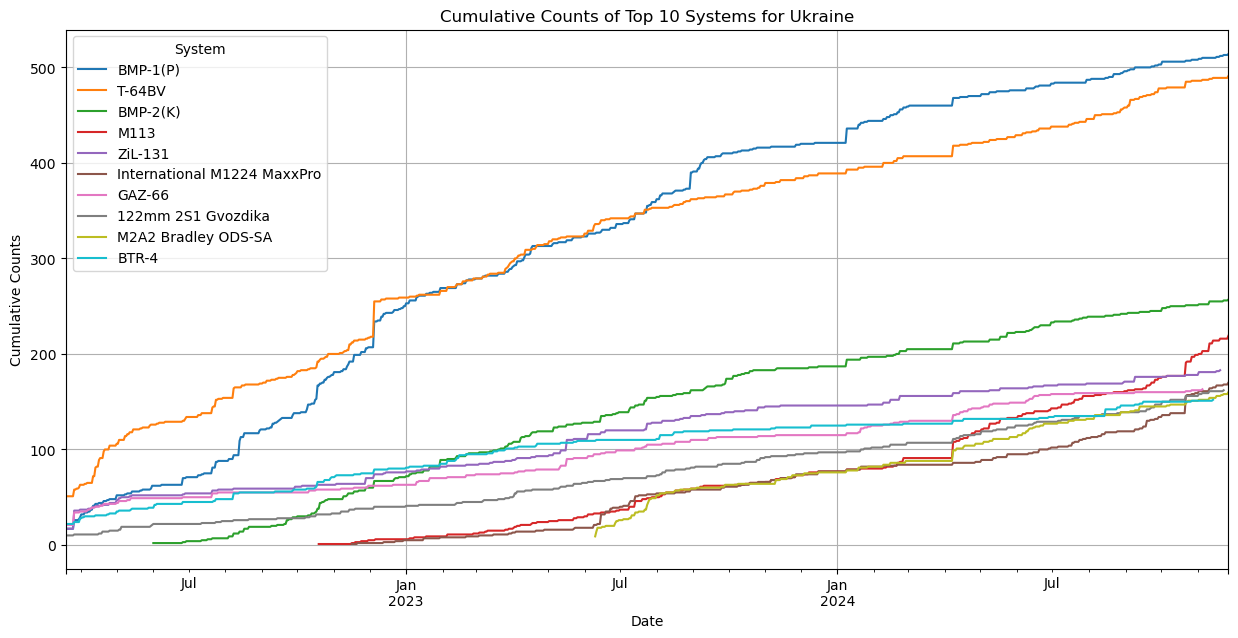

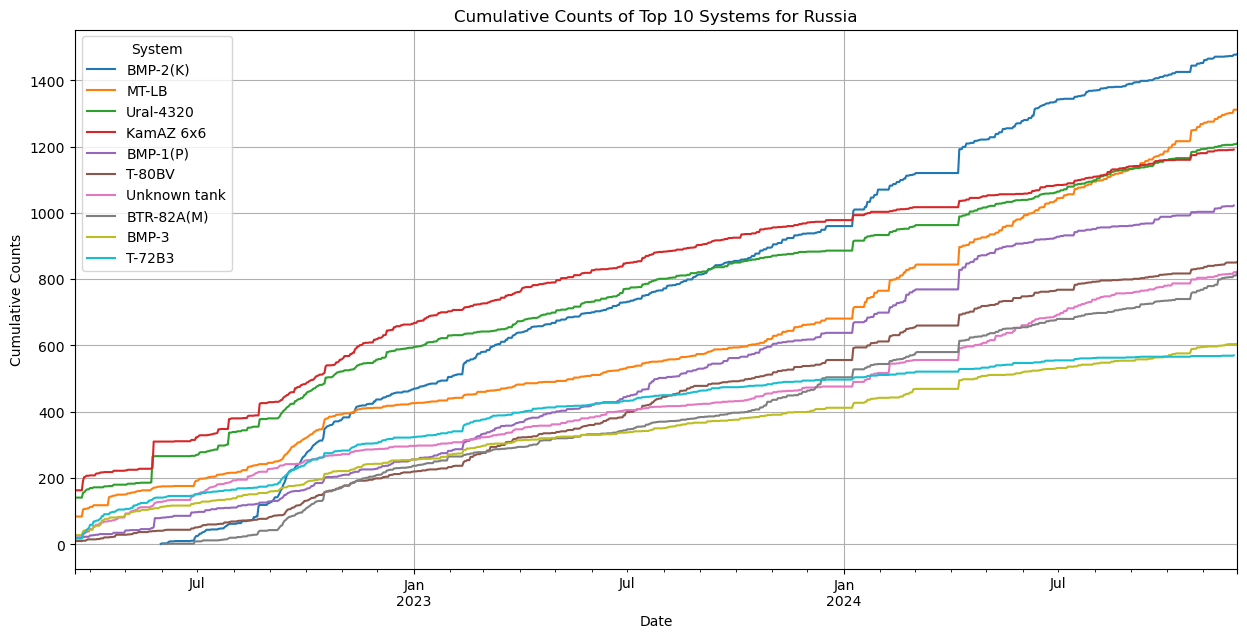

In [27]:
# Resample and calculate cumulative sum for each system separately
df3_cumulative_ukraine_system = df_date[df_date['country'] == 'Ukraine'].groupby('system').resample('D').count().groupby(level=0).cumsum()
df3_cumulative_russia_system = df_date[df_date['country'] == 'Russia'].groupby('system').resample('D').count().groupby(level=0).cumsum()

# Plot cumulative counts for top 10 systems for Ukraine
top_10_ukraine_systems = df_date[df_date['country'] == 'Ukraine']['system'].value_counts().head(10).index
for system in top_10_ukraine_systems:
    df3_cumulative_ukraine_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of Top 10 Systems for Ukraine')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='System')
plt.grid(True)
plt.show()

# Plot cumulative counts for top 10 systems for Russia
top_10_russia_systems = df_date[df_date['country'] == 'Russia']['system'].value_counts().head(10).index
for system in top_10_russia_systems:
    df3_cumulative_russia_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of Top 10 Systems for Russia')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='System')
plt.grid(True)
plt.show()

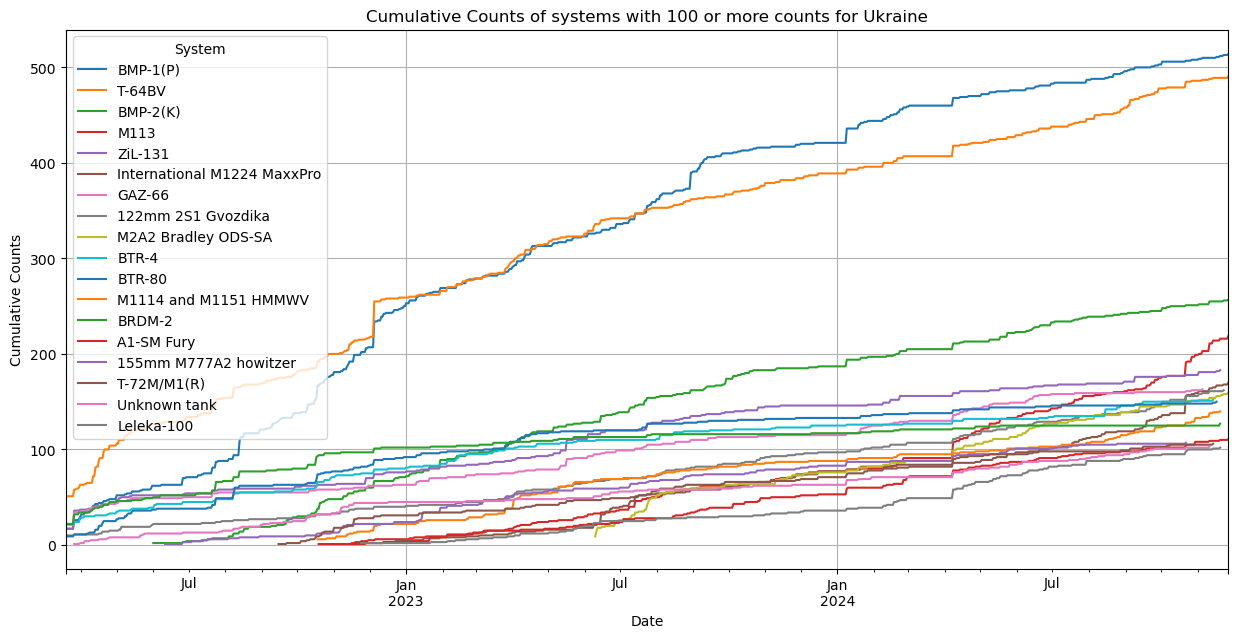

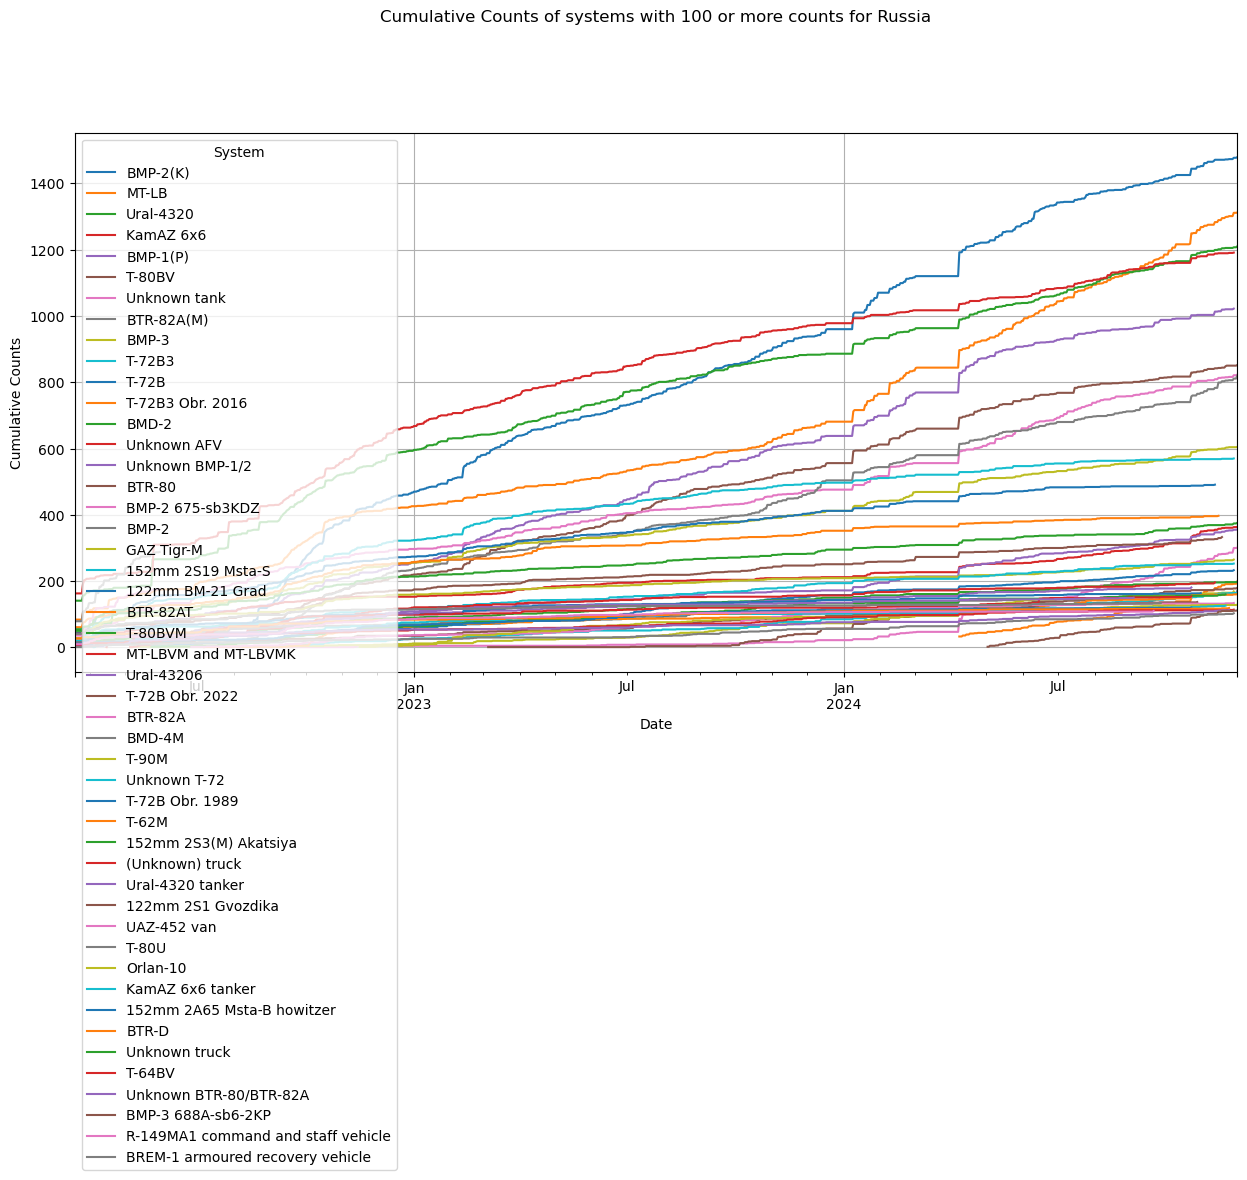

In [28]:
# Plot cumulative counts for top 10 systems for Ukraine
top_10_ukraine_systems = df_date[df_date['country'] == 'Ukraine']['system'].value_counts()
top_10_ukraine_systems = top_10_ukraine_systems[top_10_ukraine_systems >= 100].index
for system in top_10_ukraine_systems:
    df3_cumulative_ukraine_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of systems with 100 or more counts for Ukraine')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='System')
plt.grid(True)
plt.show()

# Plot cumulative counts for top 10 systems for Russia
top_10_russia_systems = df_date[df_date['country'] == 'Russia']['system'].value_counts()
top_10_russia_systems = top_10_russia_systems[top_10_russia_systems >= 100].index
for system in top_10_russia_systems:
    df3_cumulative_russia_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of systems with 100 or more counts for Russia', pad=80)
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='System')
plt.grid(True)
plt.show()

In [29]:
for s in sorted(df['system'].dropna().astype(str).unique()):
    print(s)


'Chaklun' reconnaissance UAV
'Orlan-20' ''Kartograf''
'Orlan-20' ''Kartograf'' reconnaissance UAV
'Orlan-20' reconnaissance UAV
(Unknown) truck
(Unknown) vehicle
100mm BS-3 anti-tank gun
100mm KS-19
100mm MT-12 anti-tank gun
105mm L119
105mm L119 howitzer
105mm OTO Melara Mod 56 pack howitzer
120mm 2B11/2S12
120mm 2B11/2S12A
120mm 2B16 Nona-K gun mortar
120mm 2B16 Nona-K howitzer
120mm 2S23 Nona-SVK
120mm 2S34 Khosta
120mm 2S9 Nona
120mm Alacan mortar carrier
120mm Alakran mortar carrier
120mm BRM-1K with 2S9 Nona turret
120mm BTR-3M2
120mm Bars-8MMK
120mm M120K 'Rak'
120mm self-propelled gun М1064А3
120mm М1064А3
122mm 2B17 Tornado-G
122mm 2B26 Grad-K
122mm 2S1 Gvozdika
122mm 9P138 'Grad-1'
122mm 9P138 Grad-1
122mm APR-40s
122mm BM-21 'Grad'
122mm BM-21 Grad
122mm D-30 howitzer
122mm D-30 howitzer 2A18
122mm RM-70
122mm howitzer M1938 (M-30)
127T-64BV
130mm M-46 field gun
140mm Ogon-18
152mm 2A36 Giatsint-B
152mm 2A36 Giatsint-B field-gun
152mm 2A36 Giatsint-B:
152mm 2A65 Msta-B howit

In [30]:
tanks_by_model = {
    "M-55S": ['M-55S'],
    "T-55": ['T-55AM', 'T-55 Obr. 2022'],
    "T-62": ['T-62M', 'T-62MV', 'T-62M Obr. 2022', 'Unknown T-62', 'T-62M(V)-1'],
    "T-64": ['T-64A', 'T-64B', 'T-64B1M', 'T-64BV', 'T-64BVK', "T-64BM 'Bulat'", "T-64BM2 'Bulat'", 'T-64 mine clearing roller tank', 'T-64 mine-clearing tank', 'T-64BV Obr. 2017', 'T-64BV Zr. 2017', 'Unknown T-64', 'T-64BM1M'],
    "T-72": [
        'T-72A', 'T-72A/M1', 'T-72AMT', 'T-72AV', 'T-72B', 'T-72BA', 'T-72B3', 'T-72B3 Obr. 2016', 'T-72B Obr. 2022', 'T-72AV', 
        'T-72M1', 'T-72M1R', 'Unknown T-72', 'T-72B Obr. 1989', 'T-72B3 Obr. 2022', 'Unknown T-72', "T-72 'Ural'", 'T-72EA', 'T-72M/M1(R)', 'T-72M1(R)', 'T-72M1/R', 'T-72S',
    ],
    "T-80": [
        'T-80U', 'T-80UD', 'T-80BV', 'T-80BVM', 'T-80UK', 'T-80UM2', 'T-80UM1 Bars', 'T-80BVM Obr. 2022', 'T-80UE-1', 'T-80UE1', 'Unknown T-80',
    ],
    "T-84": ['T-84 Oplot', 'BM Oplot'],
    "T-90": ['T-90A', 'T-90M', 'T-90S'],
    "Leopard": ['Leopard 1A5', 'Leopard 2A4', 'Leopard 2A5', 'Leopard 2A6', 'Leopard 2R mine-clearing tank'],
    "Abrams": ['M1A1 Abrams', 'M1A2 Abrams', 'M1A1 SA Abrams'],
    "Challenger": ['Challenger 2'],
    "AMX": ['AMX-10RC', 'AMX-10 RC(R)'],
    "Stridsvagn": ['Stridsvagn 122'],
    "PT-91": ['PT-91 Twardy'],
    "K2": ['K2 Black Panther (reported)'],
    "Other": ['Centurion Mk 5', 'FV4201 Chieftain', 'TAM', 'Unknown tank'],
}

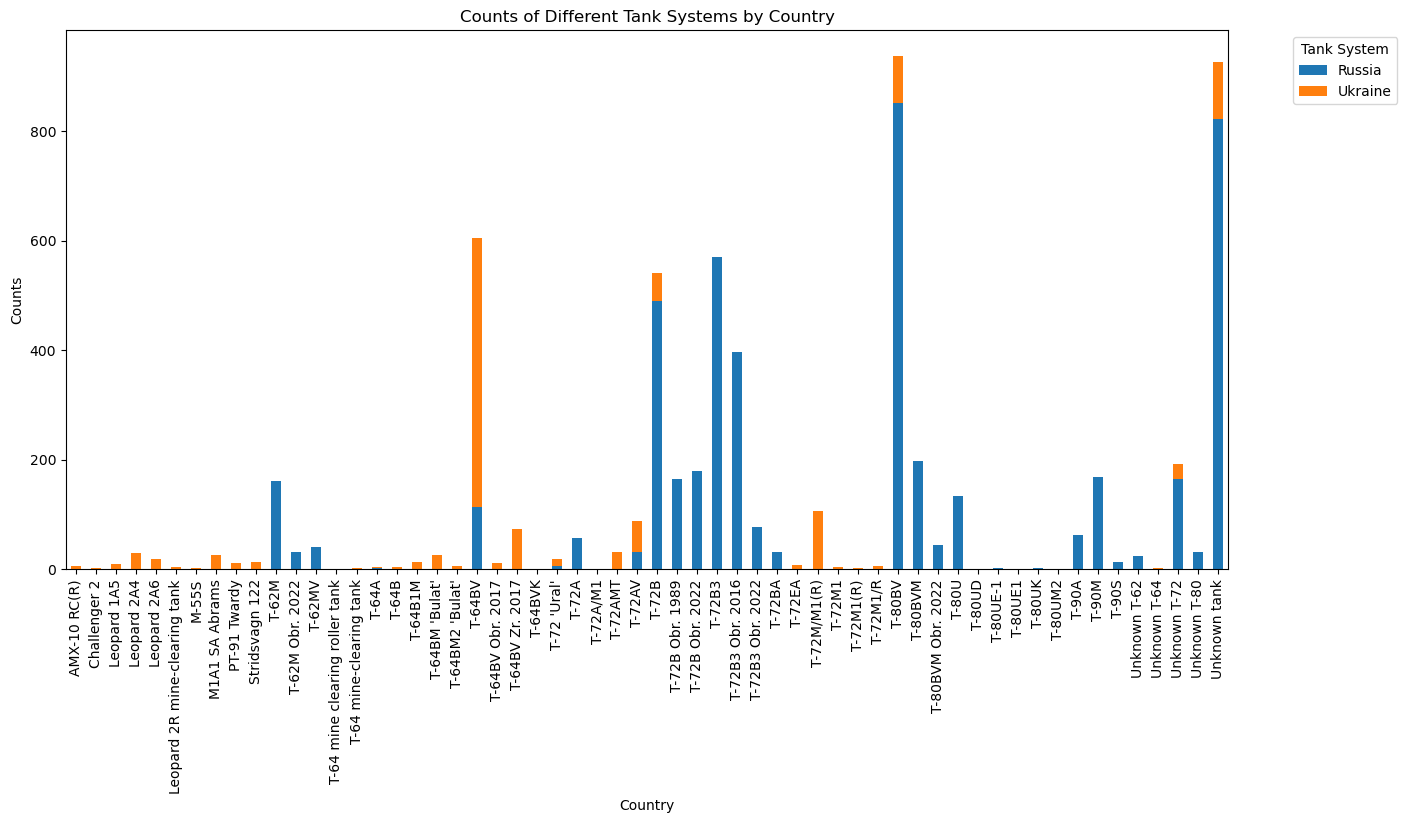

In [31]:
tank_names = [model for models in tanks_by_model.values() for model in models]
tanks_df = df[df['system'].isin(tank_names)]
country_system_counts = tanks_df.groupby(['system', 'country']).size().unstack().fillna(0)

country_system_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Counts of Different Tank Systems by Country')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.legend(title='Tank System', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=80)
plt.show()


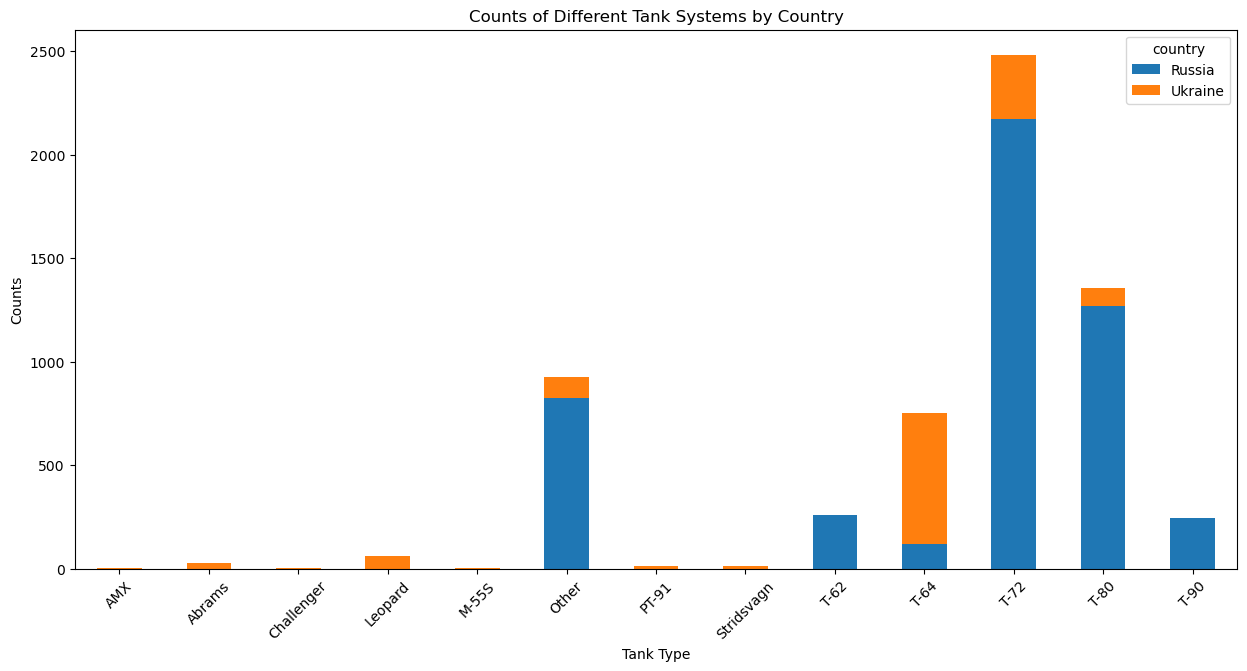

In [32]:
# Group by tank type and country
tank_counts = tanks_df['system'].apply(lambda x: next((model for model, variants in tanks_by_model.items() if x in variants), 'Other')).groupby([tanks_df['system'].apply(lambda x: next((model for model, variants in tanks_by_model.items() if x in variants), 'Other')), tanks_df['country']]).size()

tank_counts.unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Counts of Different Tank Systems by Country')
plt.xlabel('Tank Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

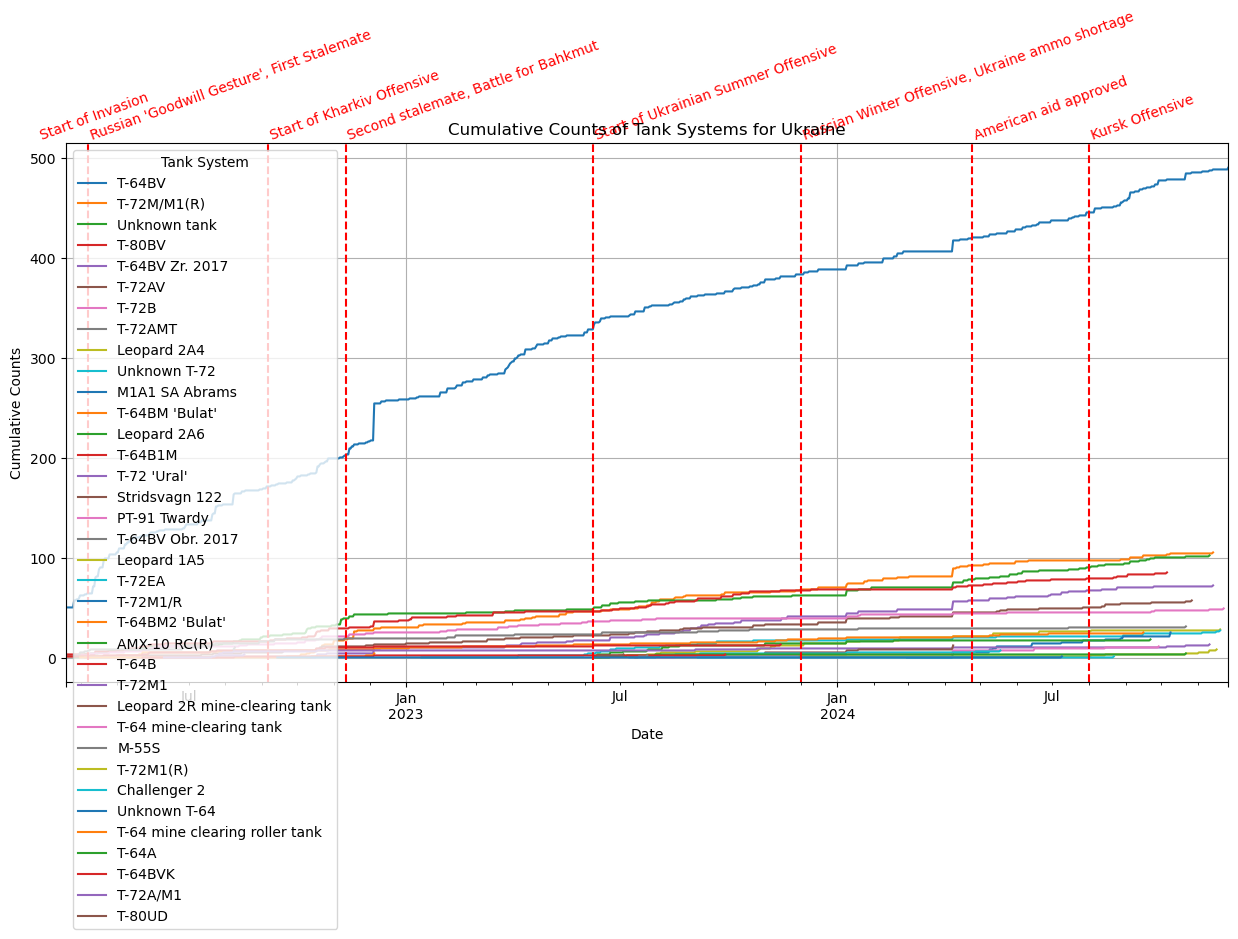

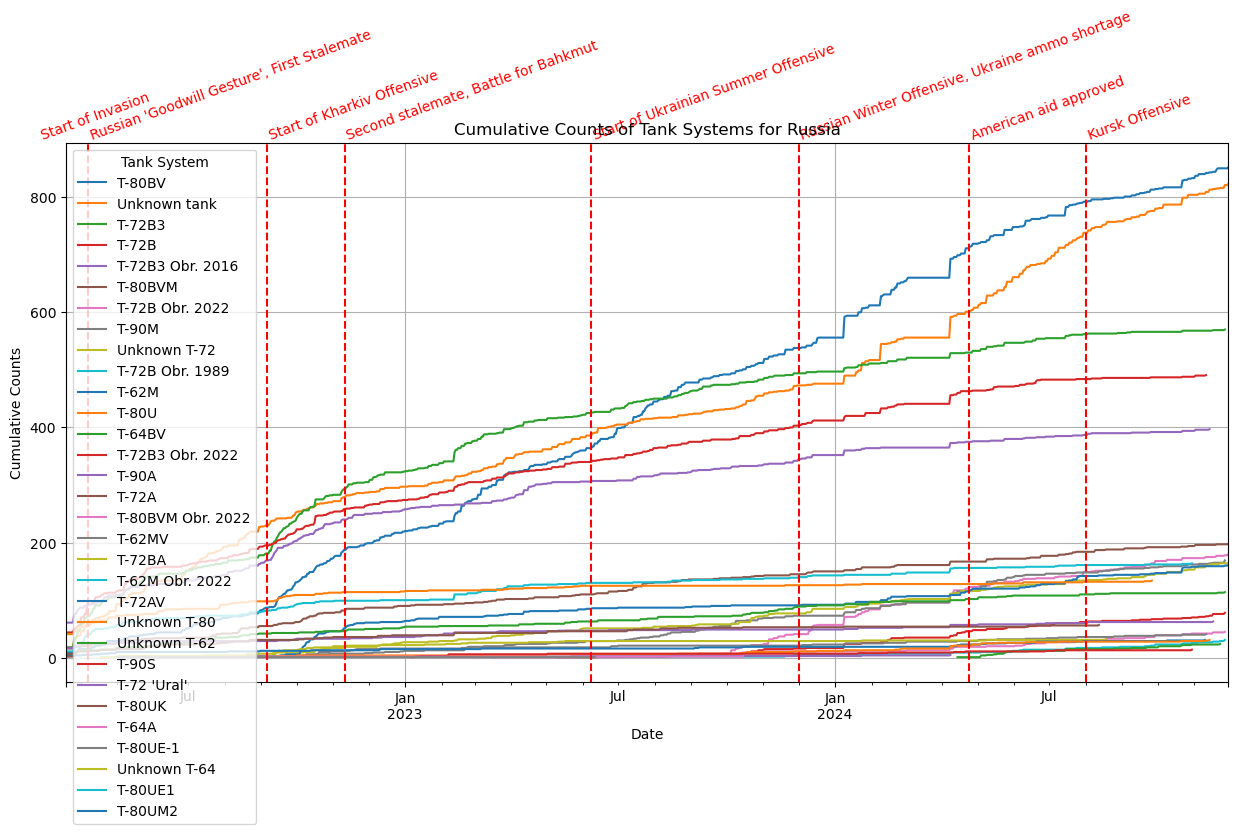

In [33]:
# Plot cumulative counts for tank systems for Ukraine
top_10_ukraine_tanks = tanks_df[tanks_df['country'] == 'Ukraine']['system'].value_counts().index
for system in top_10_ukraine_tanks:
    df3_cumulative_ukraine_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of Tank Systems for Ukraine')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='Tank System')
plt.grid(True)

# Add vertical lines and labels for important dates
for date, label in important_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), plt.ylim()[1], label, rotation=20, verticalalignment='bottom', color='red')

plt.show()

# Plot cumulative counts for tank systems for Russia
top_10_russia_tanks = tanks_df[tanks_df['country'] == 'Russia']['system'].value_counts().index
for system in top_10_russia_tanks:
    df3_cumulative_russia_system.loc[system, 'system'].plot(kind='line', figsize=(15, 7), label=system)
plt.title('Cumulative Counts of Tank Systems for Russia')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='Tank System')
plt.grid(True)

add_date_labels()

plt.show()

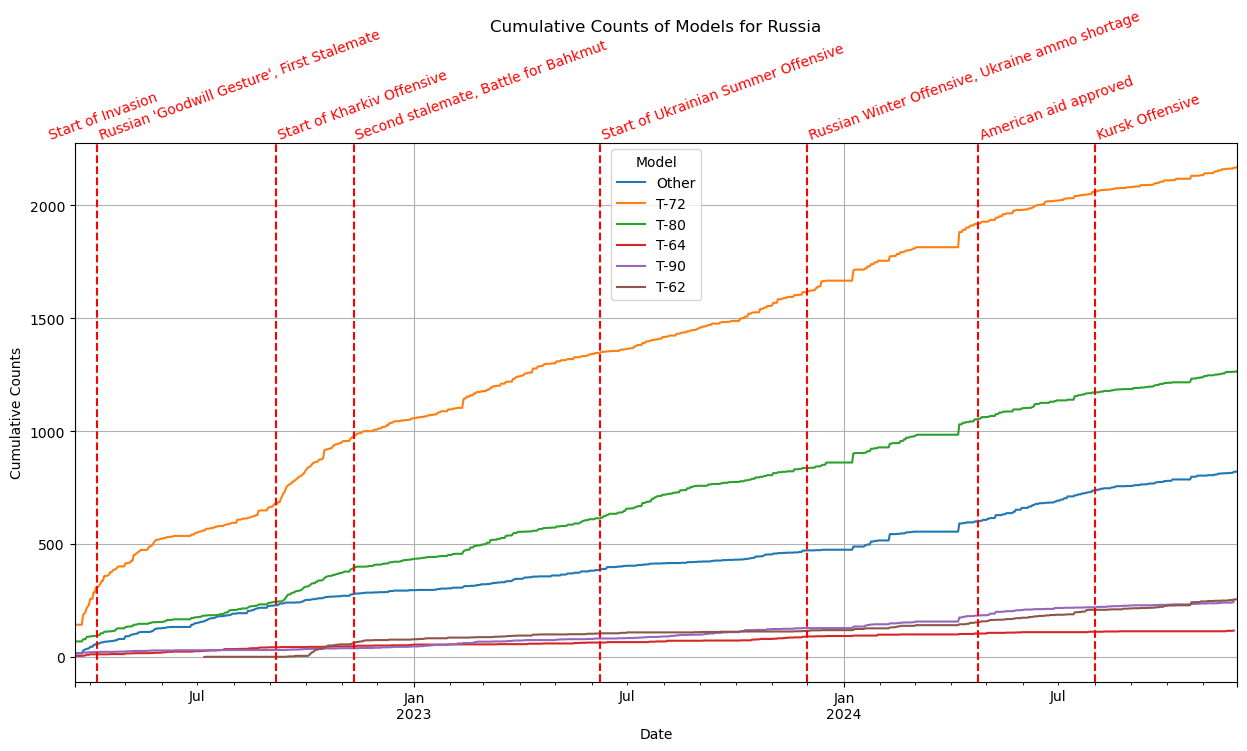

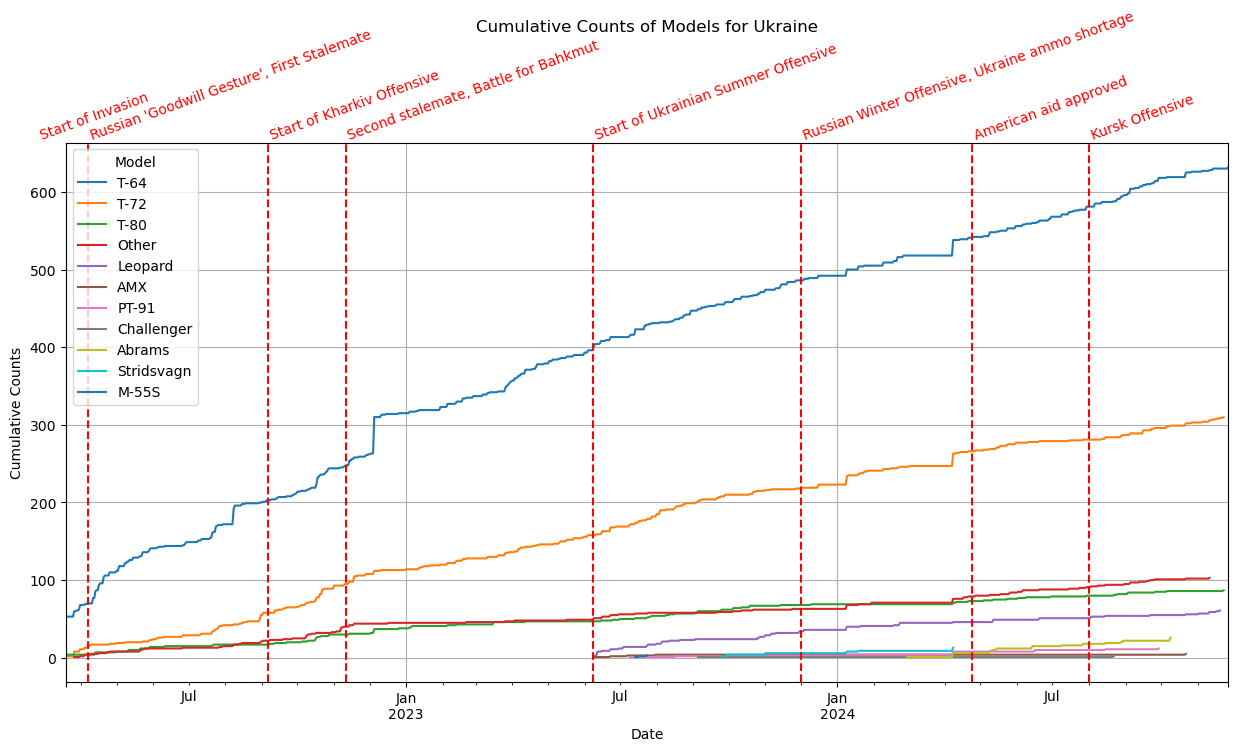

In [34]:
tanks_df = tanks_df.set_index(pd.to_datetime(tanks_df['date_recorded']))

# Map each variant to its model
tanks_df['model'] = tanks_df['system'].apply(lambda x: next((model for model, variants in tanks_by_model.items() if x in variants), 'Other'))

# Calculate cumulative counts for each model per country
cumulative_counts_by_model_country = tanks_df.groupby(['model', 'country']).resample('D').count().groupby(level=[0, 1]).cumsum()

for country in ['Russia', 'Ukraine']:
    plt.figure(figsize=(15, 7))
    country_data = cumulative_counts_by_model_country.xs(country, level='country')
    for model in country_data.groupby(level='model').size().sort_values(ascending=False).index:
        country_data.loc[model, 'system'].plot(kind='line', label=model)
    plt.title(f'Cumulative Counts of Models for {country}', pad=80)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Counts')
    plt.legend(title='Model')
    plt.grid(True)

    add_date_labels()

    plt.show()

In [35]:
quarterly_counts = tanks_df.groupby(['country', 'model', pd.Grouper(freq='Q')]).size().unstack(fill_value=0)
quarterly_counts

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/3023080613.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = tanks_df.groupby(['country', 'model', pd.Grouper(freq='Q')]).size().unstack(fill_value=0)


date_recorded       2022-03-31  2022-06-30  2022-09-30  2022-12-31  \
country model                                                        
Russia  Other               39         112         101          45   
        T-62                 0           0           6          73   
        T-64                11          16          18          10   
        T-72               231         320         266         240   
        T-80                91          86         134         123   
        T-90                22           9           5          12   
Ukraine AMX                  0           0           0           0   
        Abrams               0           0           0           0   
        Challenger           0           0           0           0   
        Leopard              0           0           0           0   
        M-55S                0           0           0           0   
        Other                2          11          12          20   
        PT-91                0           0           0           0   
        Stridsvagn           0           0           0           0   
        T-64                68          81          63         103   
        T-72                11          18          36          48   
        T-80                 4          11           5          18   

date_recorded       2023-03-31  2023-06-30  2023-09-30  2023-12-31  \
country model                                                        
Russia  Other               50          58          27          44   
        T-62                17          12           5           7   
        T-64                 3           9           7          20   
        T-72               185         122         125         178   
        T-80               121         101         120          86   
        T-90                26          11          26          18   
Ukraine AMX                  0           2           2           0   
        Abrams               0           0           0           0   
        Challenger           0           0           1           0   
        Leopard              0          12          12          12   
        M-55S                0           0           3           0   
        Other                2           9           3           4   
        PT-91                0           0           2           1   
        Stridsvagn           0           0           4           2   
        T-64                41          57          45          34   
        T-72                23          33          41          13   
        T-80                 8           3          13           7   

date_recorded       2024-03-31  2024-06-30  2024-09-30  2024-12-31  
country model                                                       
Russia  Other               80         137          87          43  
        T-62                22          46          39          30  
        T-64                 7          10           4           3  
        T-72               148         207          89          59  
        T-80               123         152          77          53  
        T-90                29          60          14          14  
Ukraine AMX                  0           0           0           1  
        Abrams               1          14           7           4  
        Challenger           0           0           1           0  
        Leopard              9           6           4           6  
        M-55S                0           0           0           0  
        Other                8          17          13           2  
        PT-91                1           6           2           0  
        Stridsvagn           3           4           0           0  
        T-64                26          50          50          14  
        T-72                24          32          17          14  
        T-80                 0          10           6           2

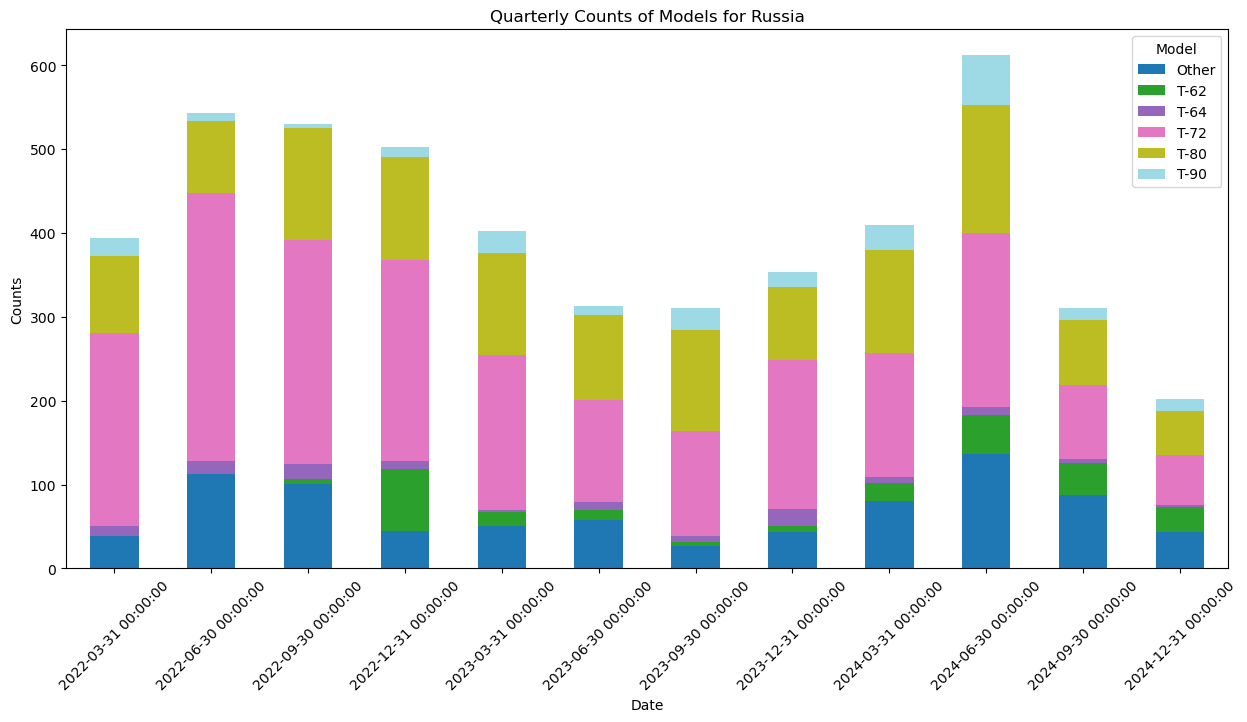

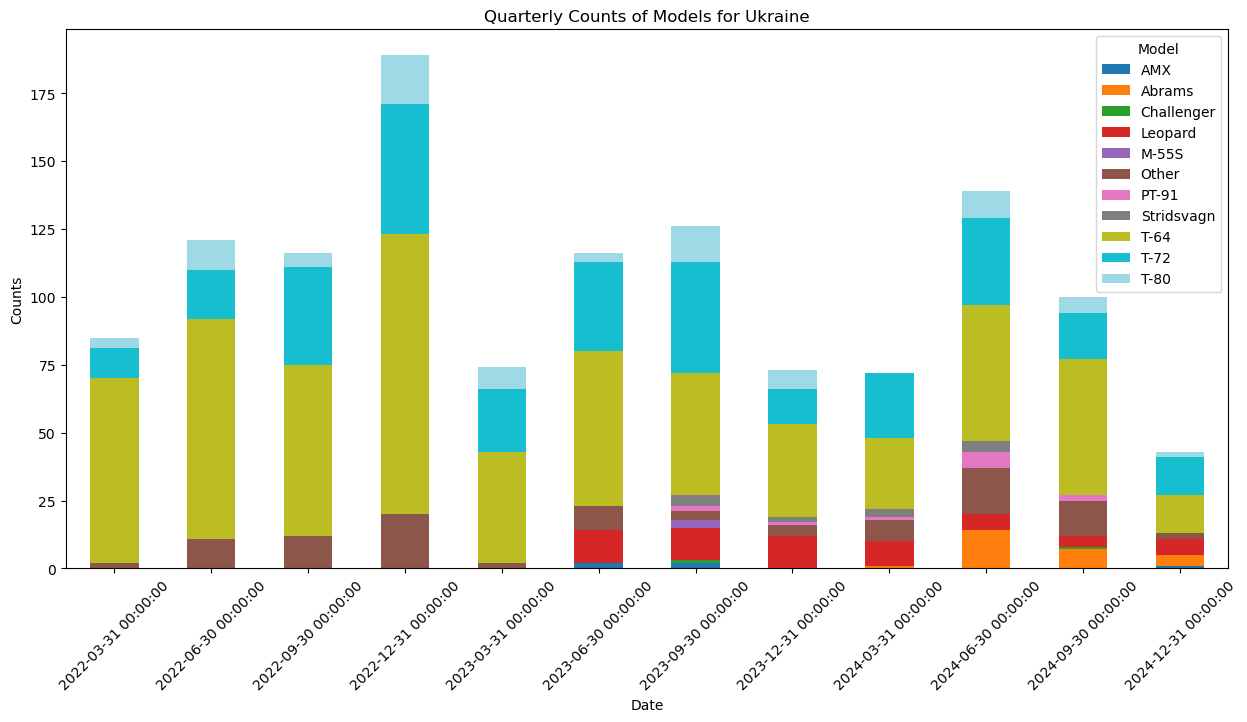

In [36]:
# Plot the data per model per country
for country in ['Russia', 'Ukraine']:
    country_data = quarterly_counts.xs(country, level='country')
    country_data.T.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend(title='Model')
    plt.xticks(rotation=45)
    plt.show()

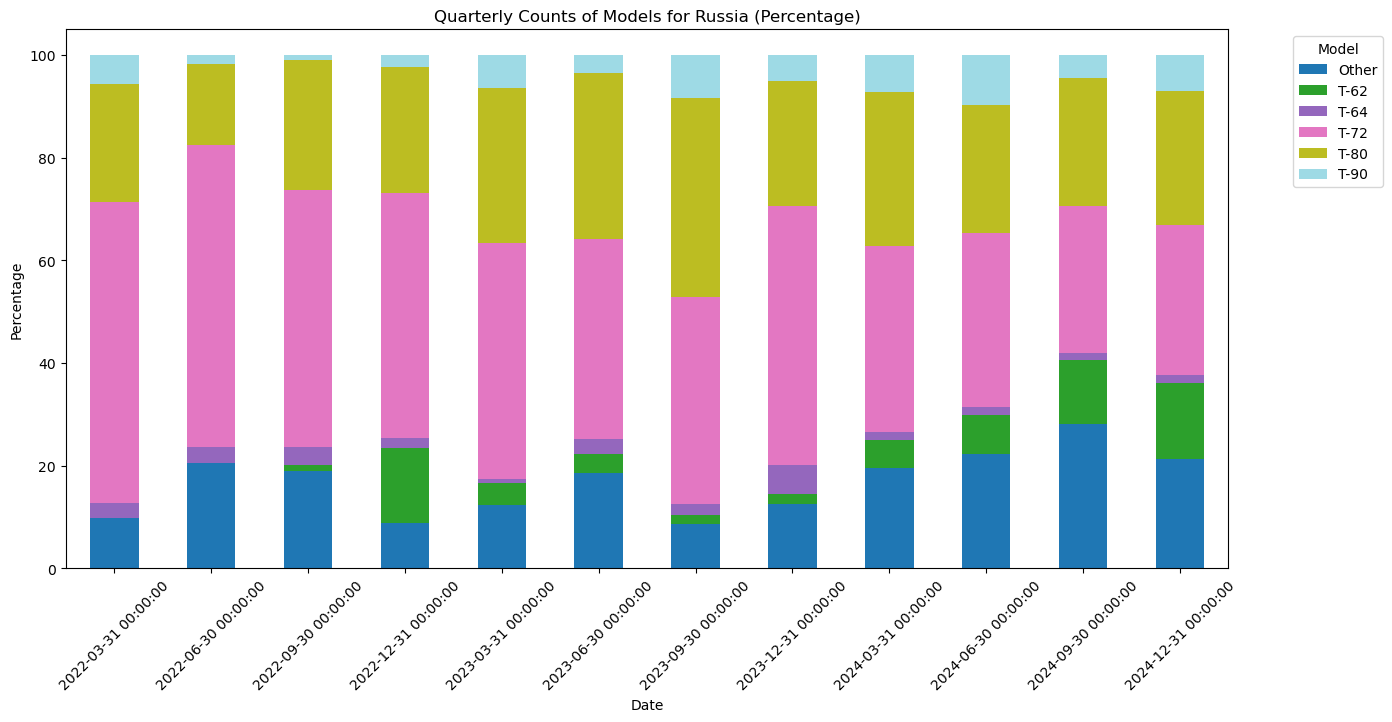

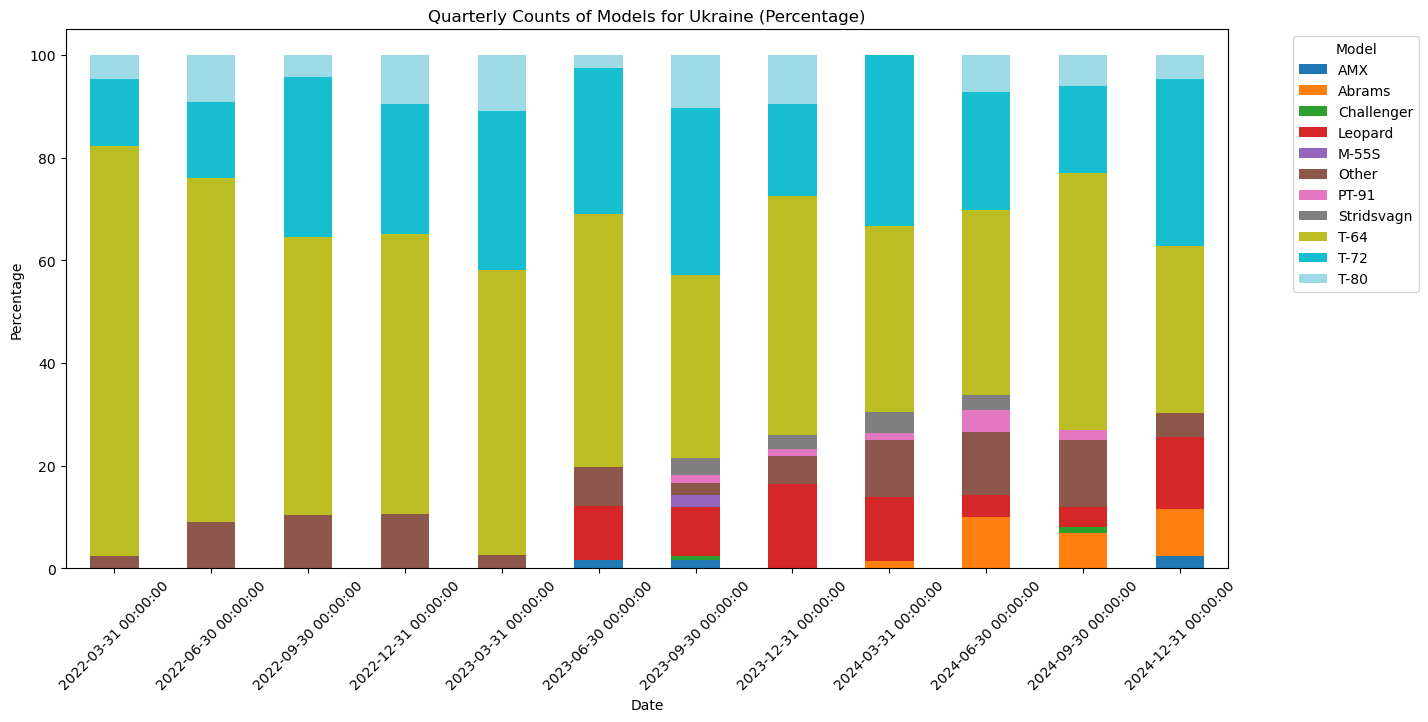

In [37]:
# Plot the data per model per country by percentage
for country in ['Russia', 'Ukraine']:
    country_data = quarterly_counts.xs(country, level='country').T
    country_data_percentage = country_data.div(country_data.sum(axis=1), axis=0).fillna(0) * 100
    country_data_percentage.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country} (Percentage)')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

daily_counts = tanks_df.groupby(['country', 'model', pd.Grouper(freq='D')]).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start=daily_counts.columns.min(), end=daily_counts.columns.max(), freq='D'), axis=1, fill_value=0)

last_date = daily_counts.columns[-1]

# Create a function to fit the SARIMAX model and make predictions
def predict_daily_counts(daily_counts, n_periods):
    predictions = {}
    for (country, model), data in daily_counts.iterrows():
        
        sarimax_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        sarimax_fit = sarimax_model.fit(disp=False)
        
        forecast = sarimax_fit.forecast(steps=n_periods)
        predictions[(country, model)] = forecast
    
    # Convert predictions to DataFrame
    predictions_df = pd.DataFrame(predictions).T
    predictions_df.columns = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')
    
    return predictions_df

predicted_daily_counts = predict_daily_counts(daily_counts, 600)
predicted_daily_counts

/opt/homebrew/anaconda3/envs/tf_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/envs/tf_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-12-01  2024-12-02  2024-12-03  2024-12-04  \
Russia  Other         0.703445    0.871323    0.634231    0.688631   
        T-62          0.539075    0.475988    0.414062    0.642240   
        T-64          0.077224    0.068354    0.056624    0.045820   
        T-72          0.597744    1.203522    0.800473    1.732330   
        T-80          0.900215    1.371904    1.136133    0.792388   
        T-90          0.244872    0.298876    0.178346    0.332479   
Ukraine AMX           0.004730    0.010193    0.021710    0.004505   
        Abrams        0.056674    0.084024    0.055015    0.098622   
        Challenger    0.002658    0.002656    0.009751    0.002656   
        Leopard       0.111909    0.146012    0.103392    0.060752   
        M-55S        -0.001506    0.007663   -0.001503   -0.001503   
        Other         0.072505    0.112074    0.083716    0.038095   
        PT-91         0.045990    0.045839    0.024394    0.017245   
        Stridsvagn   -0.006532    0.036993    0.007986    0.007912   
        T-64          0.250108    0.495481    0.433993    0.361397   
        T-72          0.170972    0.373882    0.171366    0.122435   
        T-80          0.059083    0.079577    0.003241    0.023957   

                    2024-12-05  2024-12-06  2024-12-07  2024-12-08  \
Russia  Other         0.635957    0.729435    0.638214    0.830649   
        T-62          0.530029    0.386721    0.492565    0.546756   
        T-64          0.024247    0.012642    0.030059    0.078654   
        T-72          0.674624    0.384983    1.445690    0.959775   
        T-80          0.596240    0.780316    0.757117    1.098967   
        T-90          0.213246    0.183583    0.320023    0.227532   
Ukraine AMX           0.004505    0.015041    0.009533    0.004476   
        Abrams        0.084073    0.084077    0.062424    0.054283   
        Challenger    0.009766    0.002656    0.002675    0.002693   
        Leopard       0.089182    0.103385    0.096362    0.111046   
        M-55S        -0.001503    0.003064   -0.001494   -0.002002   
        Other         0.136460    0.073786    0.059933    0.076825   
        PT-91         0.038691    0.017244    0.017367    0.045728   
        Stridsvagn   -0.006462    0.015105   -0.006368   -0.006339   
        T-64          0.392608    0.234185    0.073498    0.261445   
        T-72          0.220291    0.226977    0.224539    0.165527   
        T-80          0.065778    0.023881    0.030620    0.059361   

                    2024-12-09  2024-12-10  ...  2026-07-14  2026-07-15  \
Russia  Other         0.861343    0.634660  ...    0.009419    0.009158   
        T-62          0.496546    0.432826  ...    0.727083    0.848389   
        T-64          0.070237    0.057870  ...   -0.091120   -0.157485   
        T-72          1.422579    0.965734  ...   -0.354110   -0.282476   
        T-80          1.408265    1.176285  ...    0.763050    0.364084   
        T-90          0.310655    0.183051  ...   -0.036403   -0.048390   
Ukraine AMX           0.010017    0.021216  ...    0.028899    0.012148   
        Abrams        0.082688    0.054311  ...    0.101526    0.144139   
        Challenger    0.002693    0.009784  ...    0.012904    0.005813   
        Leopard       0.146492    0.103937  ...    0.166316    0.123762   
        M-55S         0.010182   -0.002001  ...   -0.002723   -0.002723   
        Other         0.121388    0.090576  ...    0.068178    0.018320   
        PT-91         0.045727    0.024447  ...    0.044486    0.037393   
        Stridsvagn    0.036604    0.007939  ...    0.011805    0.011732   
        T-64          0.526083    0.460259  ...    0.114293   -0.113157   
        T-72          0.378073    0.172483  ...    0.061129    0.011494   
        T-80          0.080439    0.002654  ...   -0.052187   -0.031070   

                    2026-07-16  2026-07-17  2026-07-18  2026-07-19  \
Russia  Other         0.010060    0.104537   -0.009281    0.199244   
       

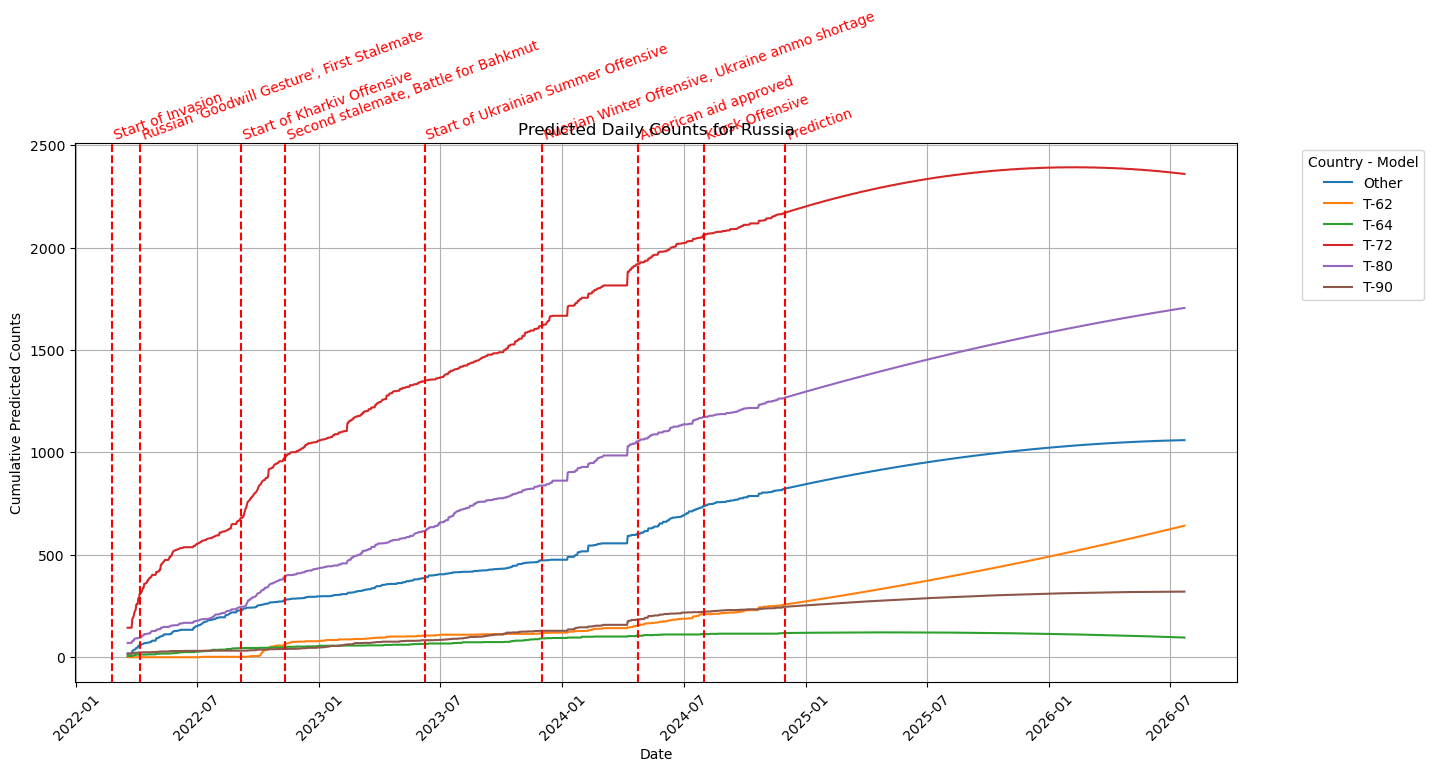

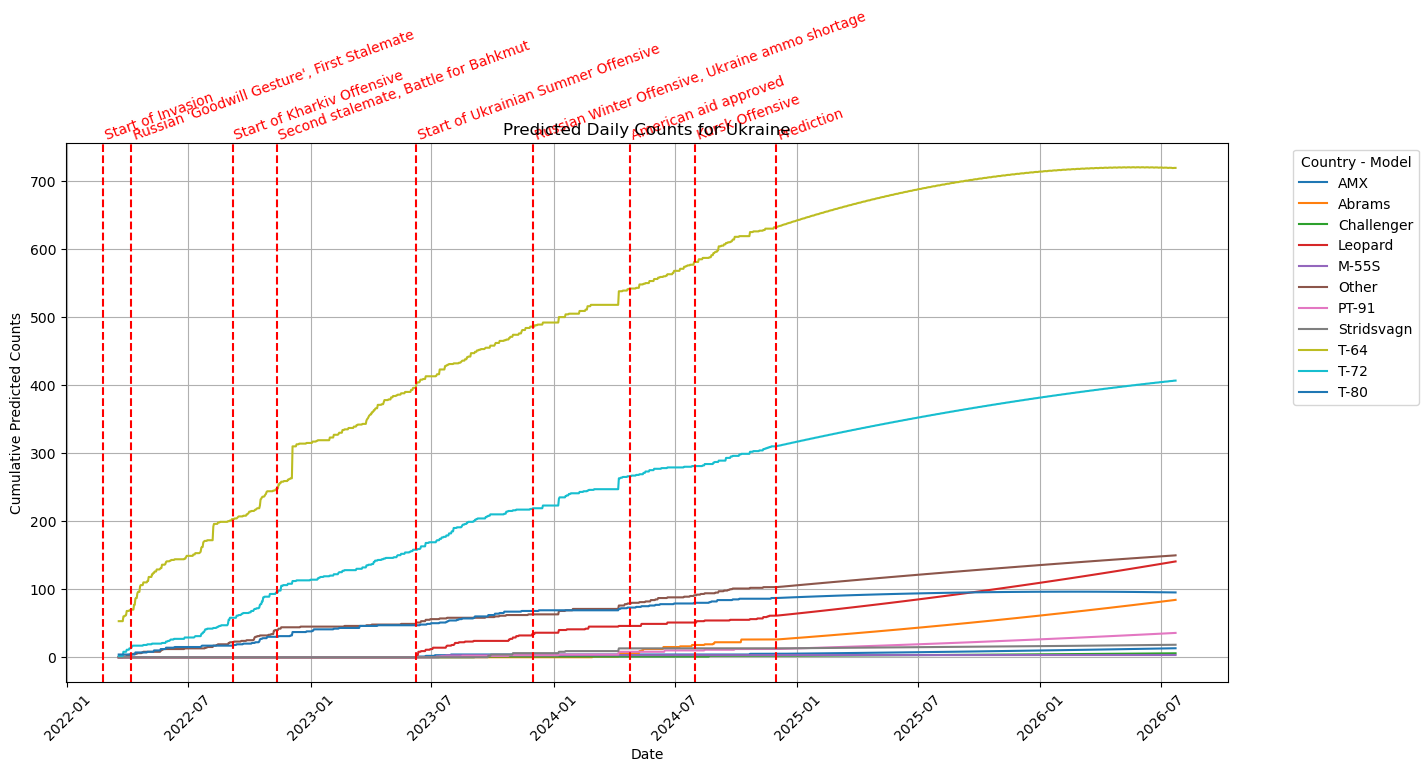

In [39]:
# Align the indices of daily_counts and predicted_daily_counts
cumulative_predictions = pd.concat([daily_counts, predicted_daily_counts], axis=1).cumsum(axis=1)

# Convert the list to a DataFrame and then group by country
grouping = pd.DataFrame([(country, model, data) for (country, model), data in cumulative_predictions.iterrows()], columns=['country', 'model', 'data'])

for country, models in grouping.groupby('country'):
    # Plot the cumulative predicted daily counts for the next days
    fig, ax = plt.subplots(figsize=(15, 7))
    for model, data in models.groupby('model'):
        ax.plot(cumulative_predictions.columns, data.iloc[0]['data'], label=model)

    ax.set_title('Predicted Daily Counts for ' + country)
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Predicted Counts')
    ax.legend(title='Country - Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)

    add_date_labels()

    plt.axvline(last_date, color='red', linestyle='--')
    plt.text(last_date, plt.ylim()[1], 'Prediction', rotation=20, verticalalignment='bottom', color='red')

    plt.show()

In [40]:
cumulative_predictions

2022-03-19  2022-03-20  2022-03-21  2022-03-22  \
Russia  Other             18.0        18.0        18.0        18.0   
        T-62               0.0         0.0         0.0         0.0   
        T-64               6.0         6.0         6.0         6.0   
        T-72             144.0       144.0       144.0       144.0   
        T-80              70.0        70.0        70.0        70.0   
        T-90              17.0        17.0        17.0        17.0   
Ukraine AMX                0.0         0.0         0.0         0.0   
        Abrams             0.0         0.0         0.0         0.0   
        Challenger         0.0         0.0         0.0         0.0   
        Leopard            0.0         0.0         0.0         0.0   
        M-55S              0.0         0.0         0.0         0.0   
        Other              0.0         0.0         0.0         0.0   
        PT-91              0.0         0.0         0.0         0.0   
        Stridsvagn         0.0         0.0         0.0         0.0   
        T-64              53.0        53.0        53.0        53.0   
        T-72               2.0         2.0         2.0         2.0   
        T-80               4.0         4.0         4.0         4.0   

                    2022-03-23  2022-03-24  2022-03-25  2022-03-26  \
Russia  Other             18.0        18.0        18.0        29.0   
        T-62               0.0         0.0         0.0         0.0   
        T-64               6.0         6.0         6.0         7.0   
        T-72             144.0       144.0       144.0       186.0   
        T-80              70.0        70.0        70.0        79.0   
        T-90              17.0        17.0        17.0        20.0   
Ukraine AMX                0.0         0.0         0.0         0.0   
        Abrams             0.0         0.0         0.0         0.0   
        Challenger         0.0         0.0         0.0         0.0   
        Leopard            0.0         0.0         0.0         0.0   
        M-55S              0.0         0.0         0.0         0.0   
        Other              0.0         0.0         0.0         1.0   
        PT-91              0.0         0.0         0.0         0.0   
        Stridsvagn         0.0         0.0         0.0         0.0   
        T-64              53.0        53.0        53.0        60.0   
        T-72               2.0         2.0         2.0         8.0   
        T-80               4.0         4.0         4.0         4.0   

                    2022-03-27  2022-03-28  ...   2026-07-14   2026-07-15  \
Russia  Other             32.0        35.0  ...  1059.231274  1059.240431   
        T-62               0.0         0.0  ...   634.931071   635.779461   
        T-64               7.0         8.0  ...    97.223466    97.065981   
        T-72             193.0       199.0  ...  2363.033701  2362.751225   
        T-80              80.0        80.0  ...  1701.022712  1701.386796   
        T-90              21.0        21.0  ...   320.317682   320.269292   
Ukraine AMX                0.0         0.0  ...    13.041208    13.053356   
        Abrams             0.0         0.0  ...    83.180766    83.324905   
        Challenger         0.0         0.0  ...     5.697402     5.703215   
        Leopard            0.0         0.0  ...   139.380716   139.504478   
        M-55S              0.0         0.0  ...     3.267237     3.264513   
        Other              1.0         1.0  ...   149.188506   149.206826   
        PT-91              0.0         0.0  ...    35.292212    35.329604   
        Stridsvagn         0.0         0.0  ...    18.230366    18.242098   
        T-64              60.0        61.0  ...   719.583213   719.470056   
        T-72               8.0         8.0  ...   405.800111   405.811605   
        T-80               4.0         4.0  ...    95.339972    95.308902   

                     2026-07-16   2026-07-17   2026-07-18   2026-07-19  \
Russia  Other       1059.250491  1059

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/3377663121.py:2: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  quarterly_cumulative_predictions = cumulative_predictions.diff(axis=1).resample('Q', axis=1).sum()
/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/3377663121.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_cumulative_predictions = cumulative_predictions.diff(axis=1).resample('Q', axis=1).sum()


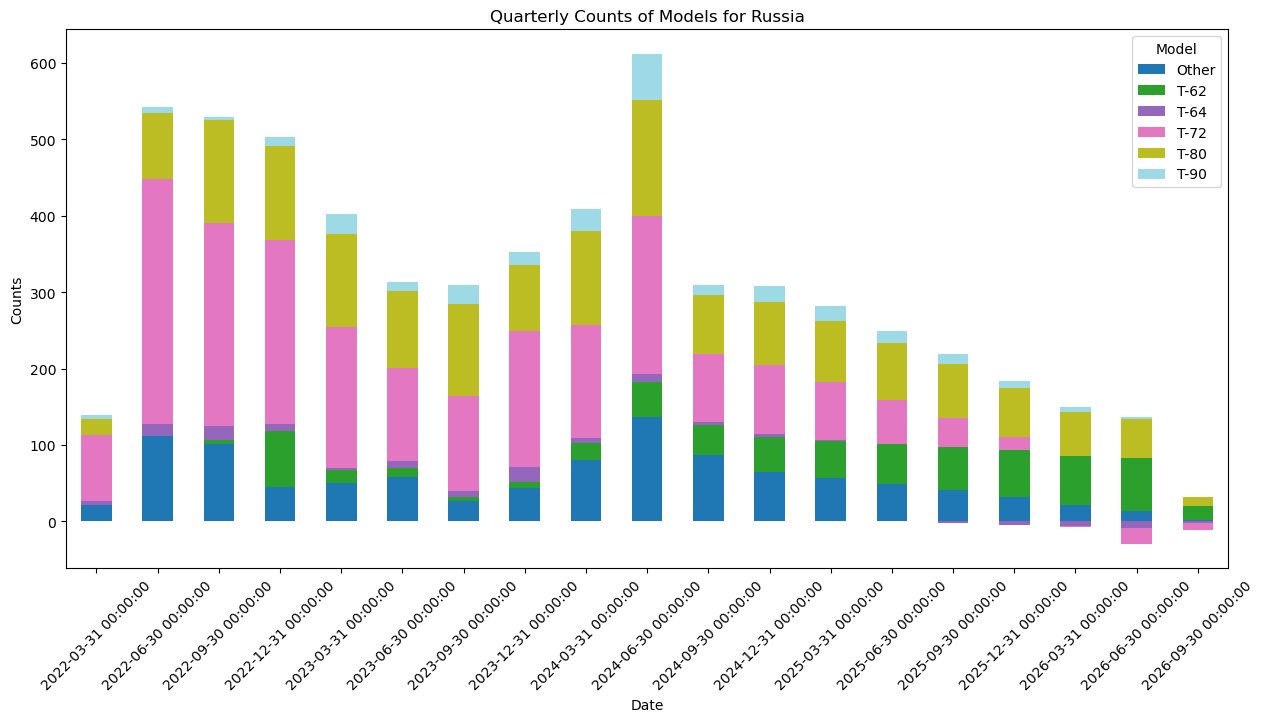

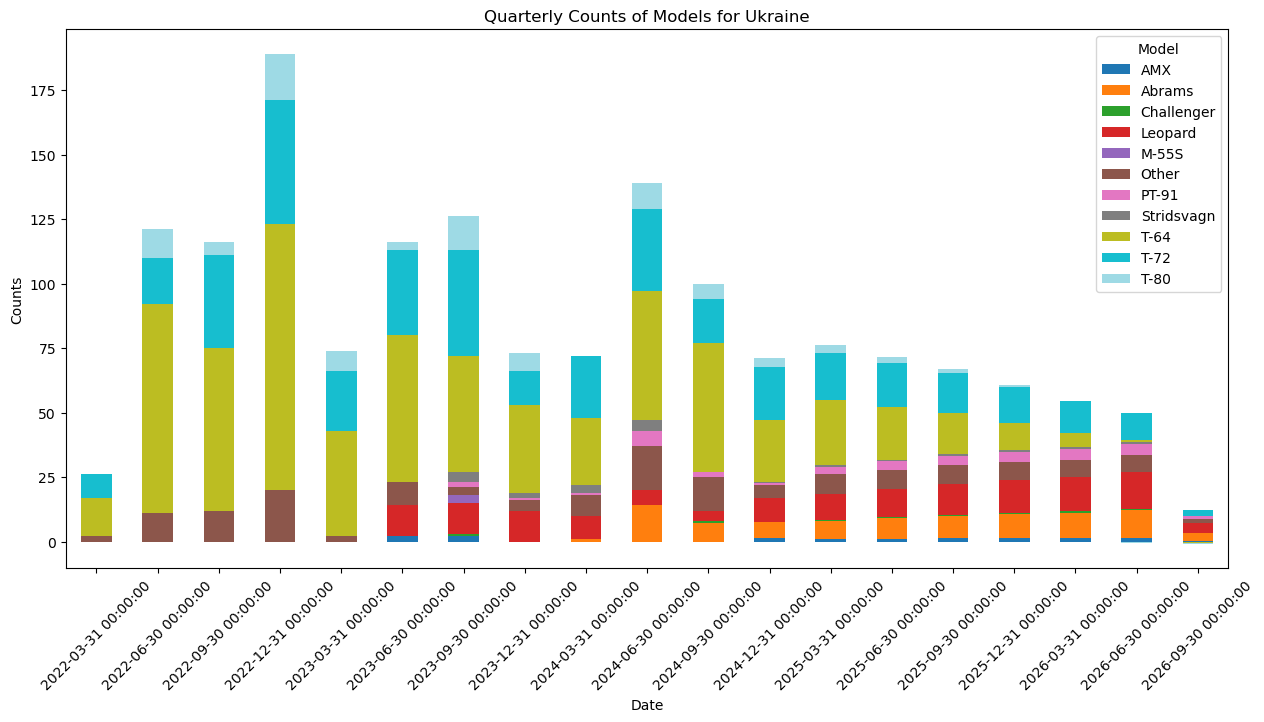

In [41]:
# Resample cumulative_predictions to quarterly frequency and sum the occurrences
quarterly_cumulative_predictions = cumulative_predictions.diff(axis=1).resample('Q', axis=1).sum()

for country in ['Russia', 'Ukraine']:
    country_data = quarterly_cumulative_predictions.xs(country, level=0)
    country_data.T.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend(title='Model')
    plt.xticks(rotation=45)
    plt.show()

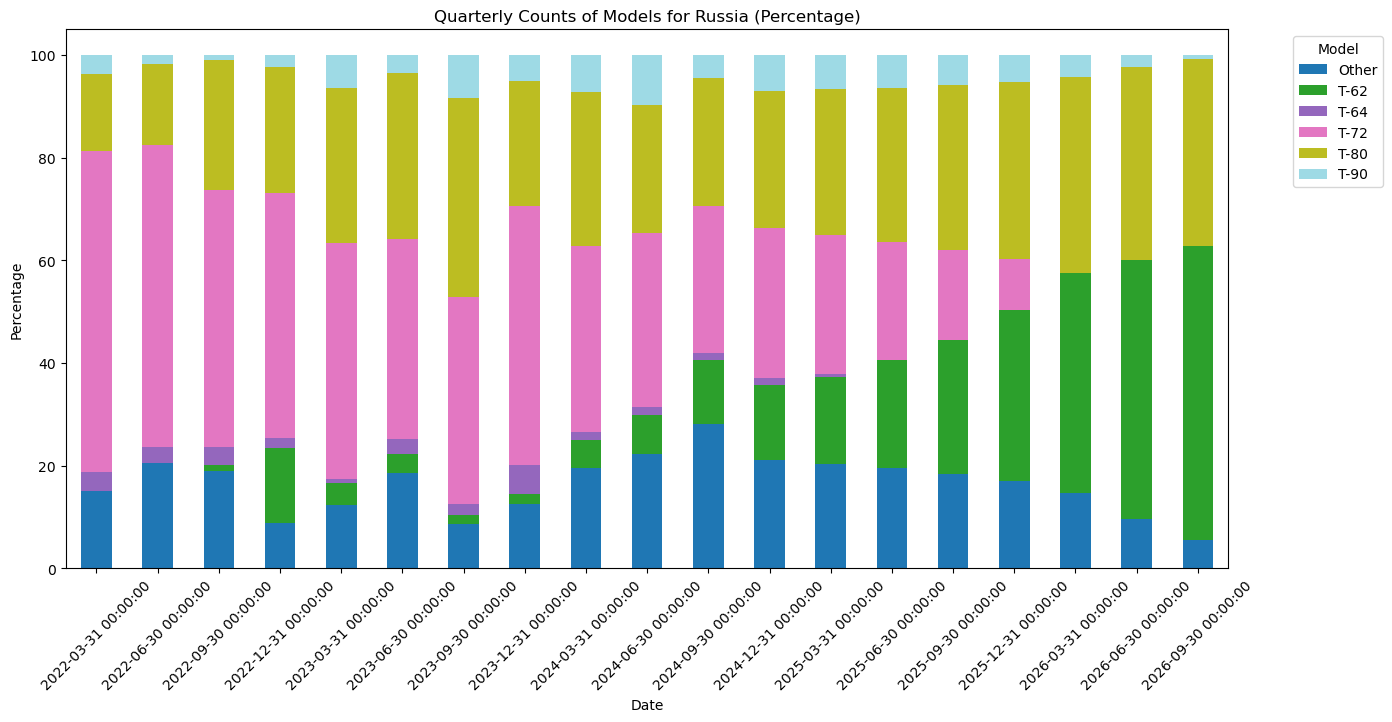

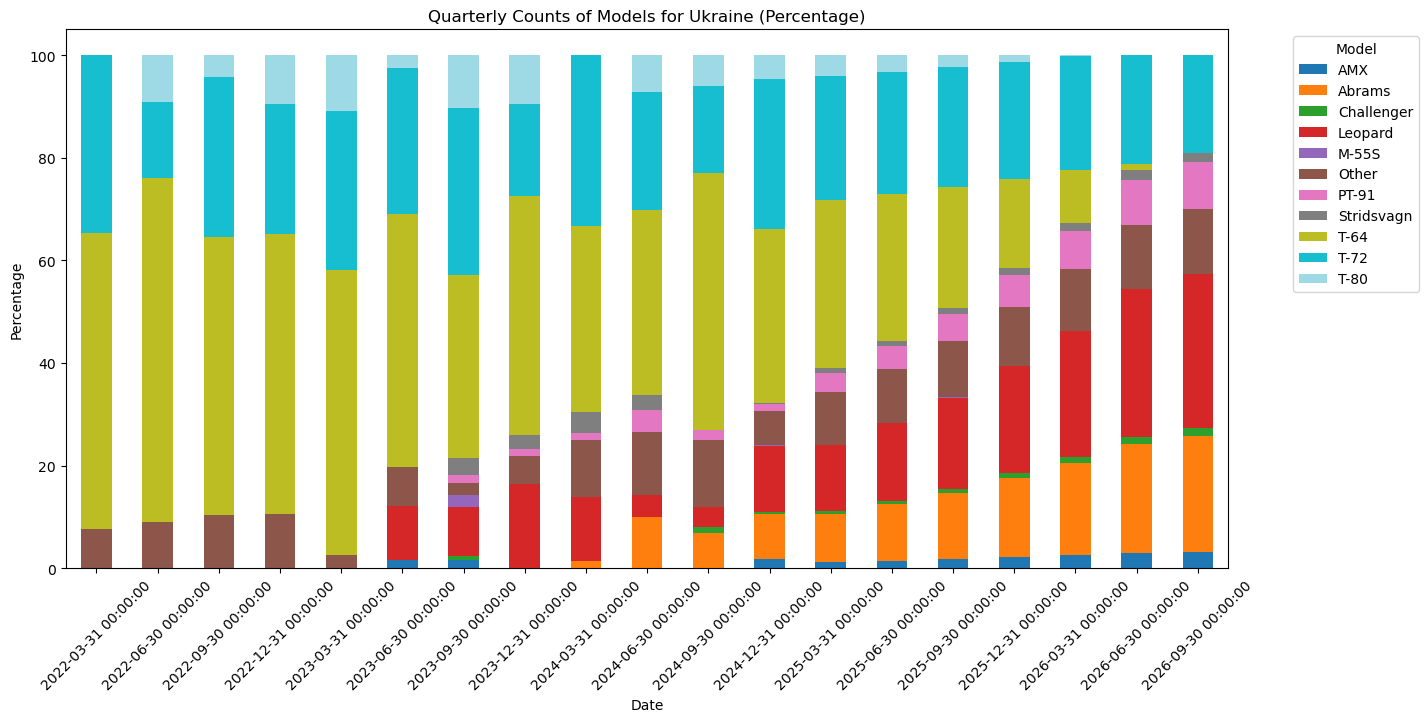

In [42]:
for country in ['Russia', 'Ukraine']:
    country_data = quarterly_cumulative_predictions.xs(country, level=0).T
    country_data[country_data < 0] = 0
    country_data_percentage = country_data.div(country_data.sum(axis=1), axis=0).fillna(0) * 100
    country_data_percentage.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country} (Percentage)')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
data = daily_counts.T

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
print(X)
print(y)

[[[0.5        0.         1.         ... 1.         0.125      0.8       ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.05660377 0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

Epoch 1/3


2024-12-02 16:12:42.942785: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-12-02 16:12:42.942810: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-12-02 16:12:42.942814: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-12-02 16:12:42.942827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-02 16:12:42.942837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/anaconda3/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When usin

24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 656ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 670ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 659ms/step - loss: 0.0033 - val_loss: 0.0034
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0033
Test Loss: 0.0034128420520573854
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


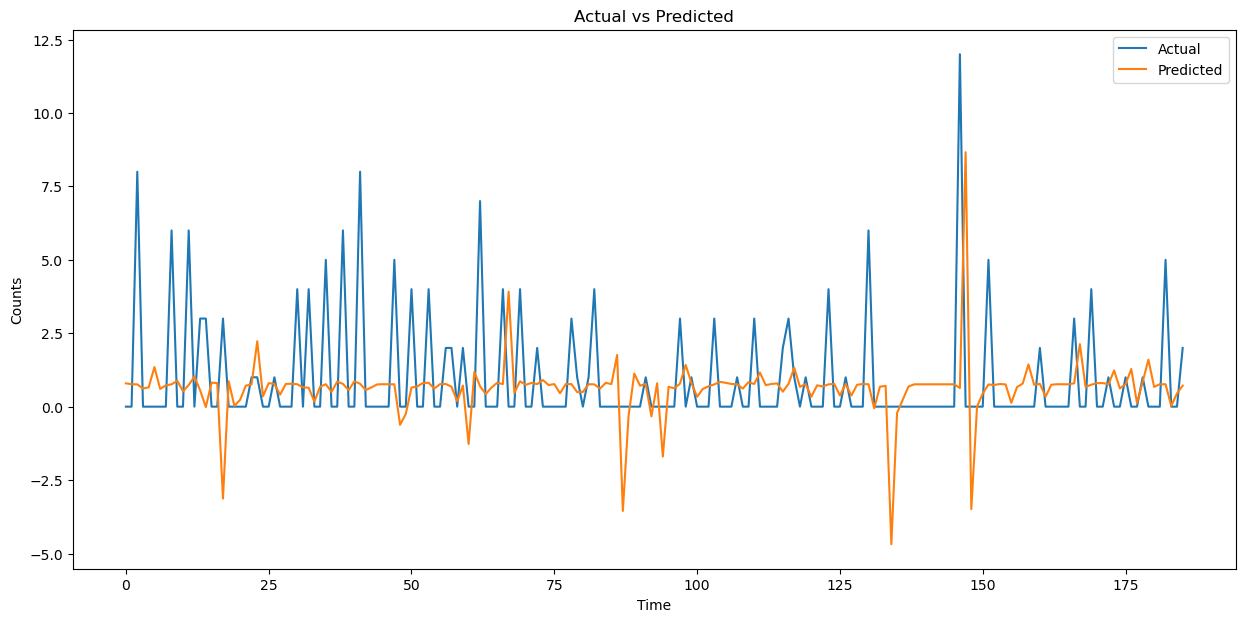

In [44]:
import tensorflow as tf

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(seq_length, X.shape[2])),
    tf.keras.layers.Dense(X.shape[2])
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(15, 7))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()

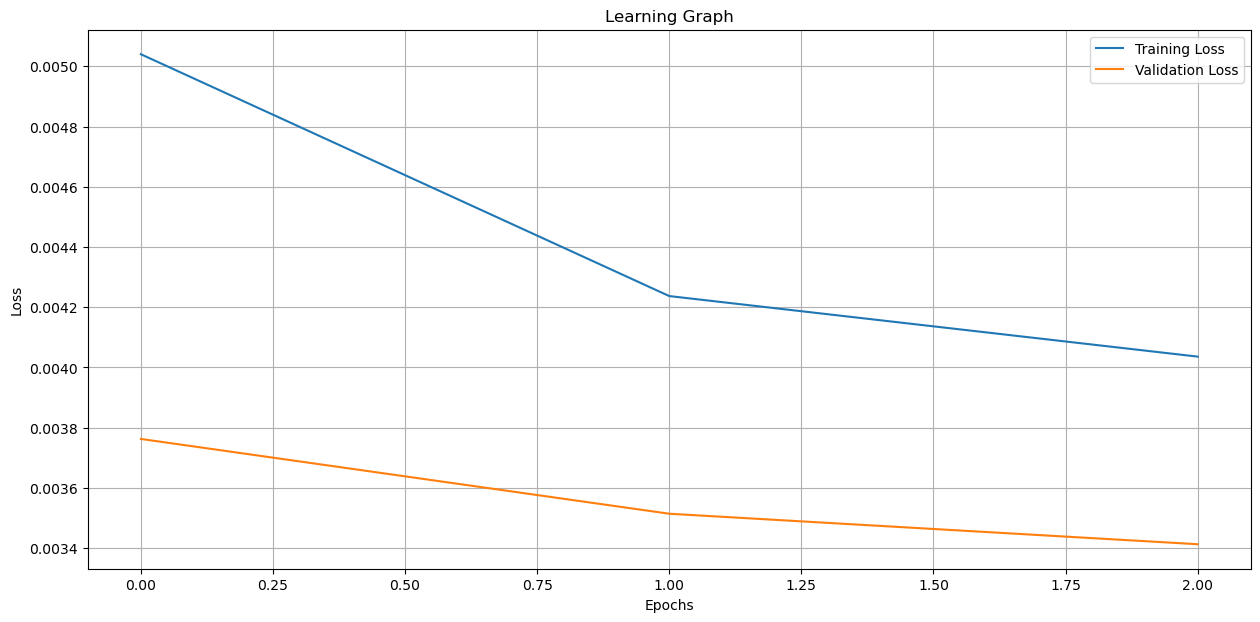

In [45]:
# Plot the learning graph
plt.figure(figsize=(15, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
timeline = model.predict(X)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [47]:
predicted_data = scaler.inverse_transform(timeline)
prediction_index = daily_counts.columns[seq_length:]
prediction_index = pd.to_datetime(prediction_index)
predicted_data_df = pd.DataFrame(predicted_data.T, index=daily_counts.index, columns=prediction_index).T

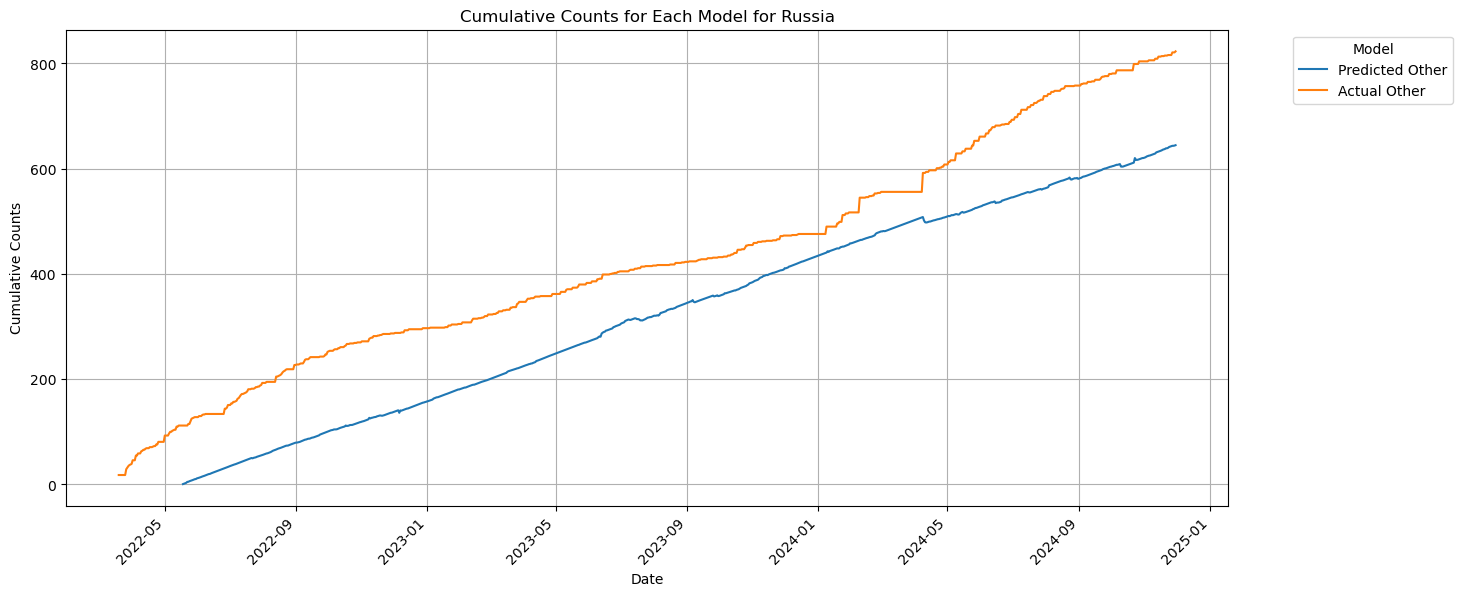

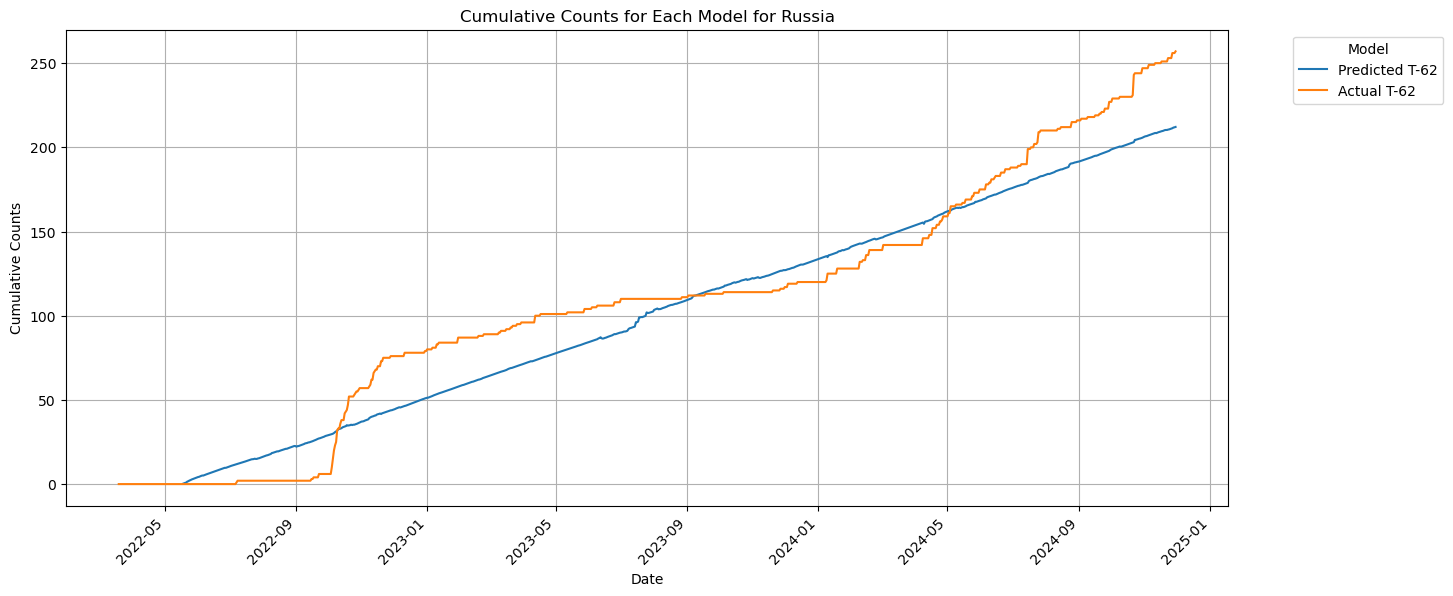

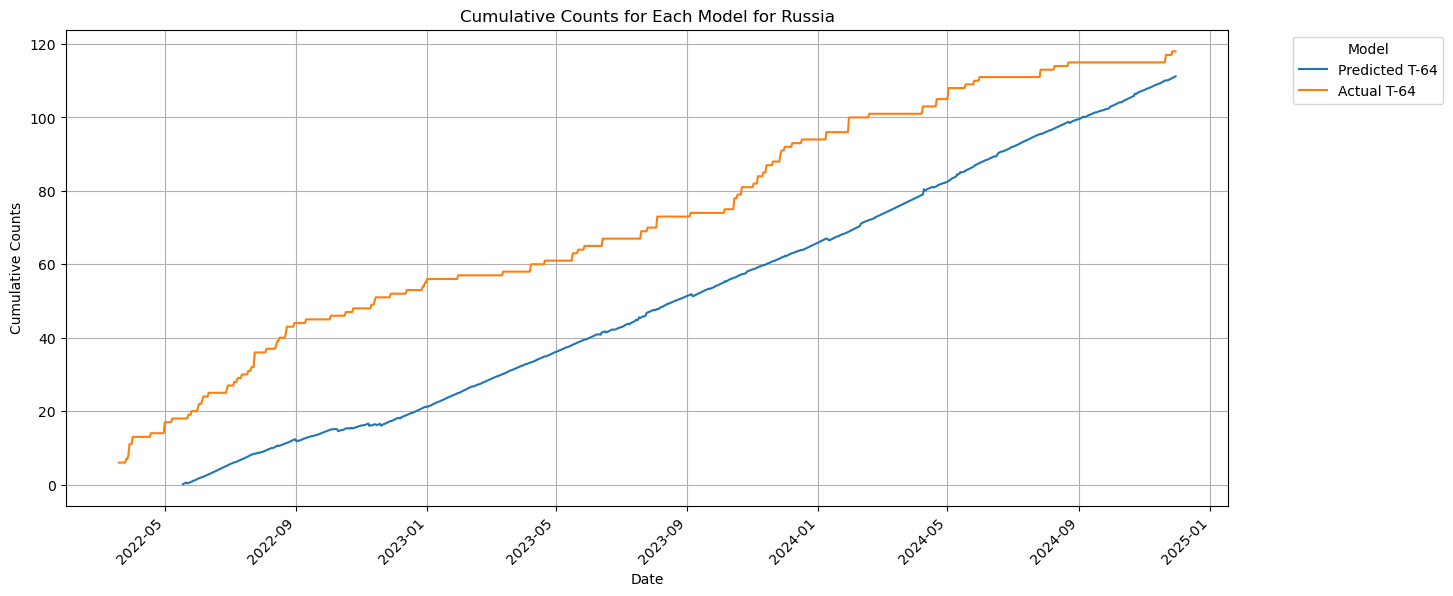

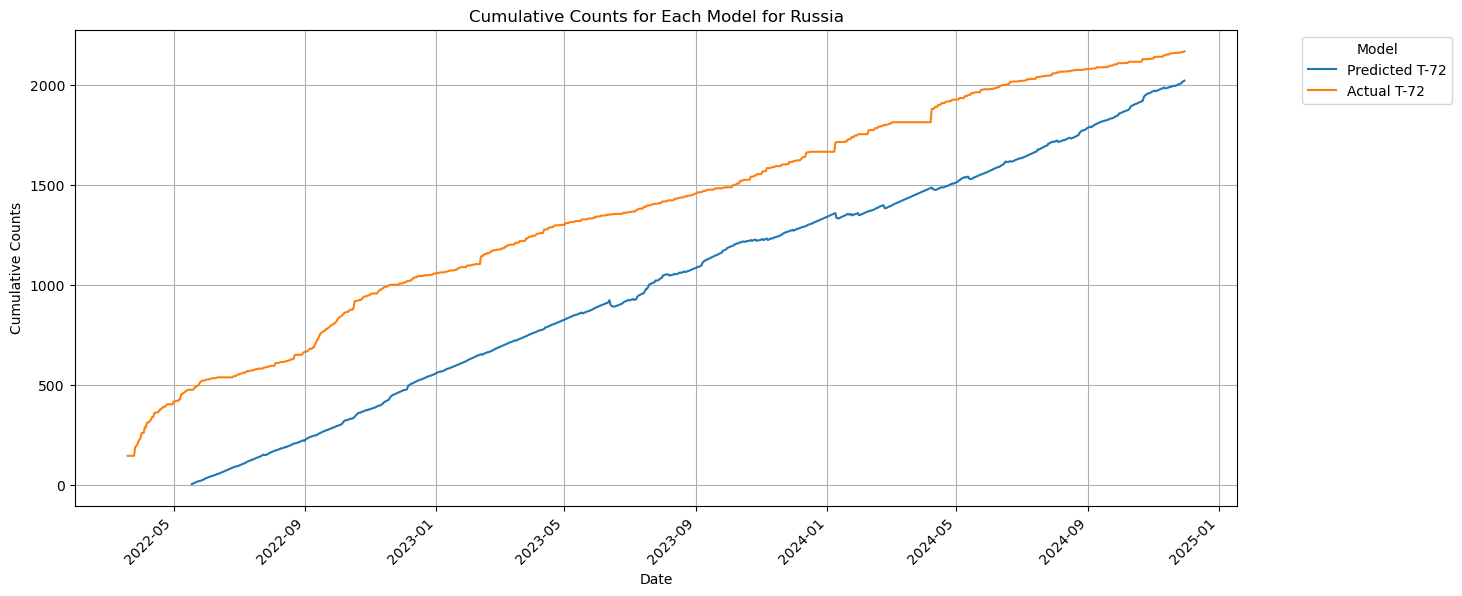

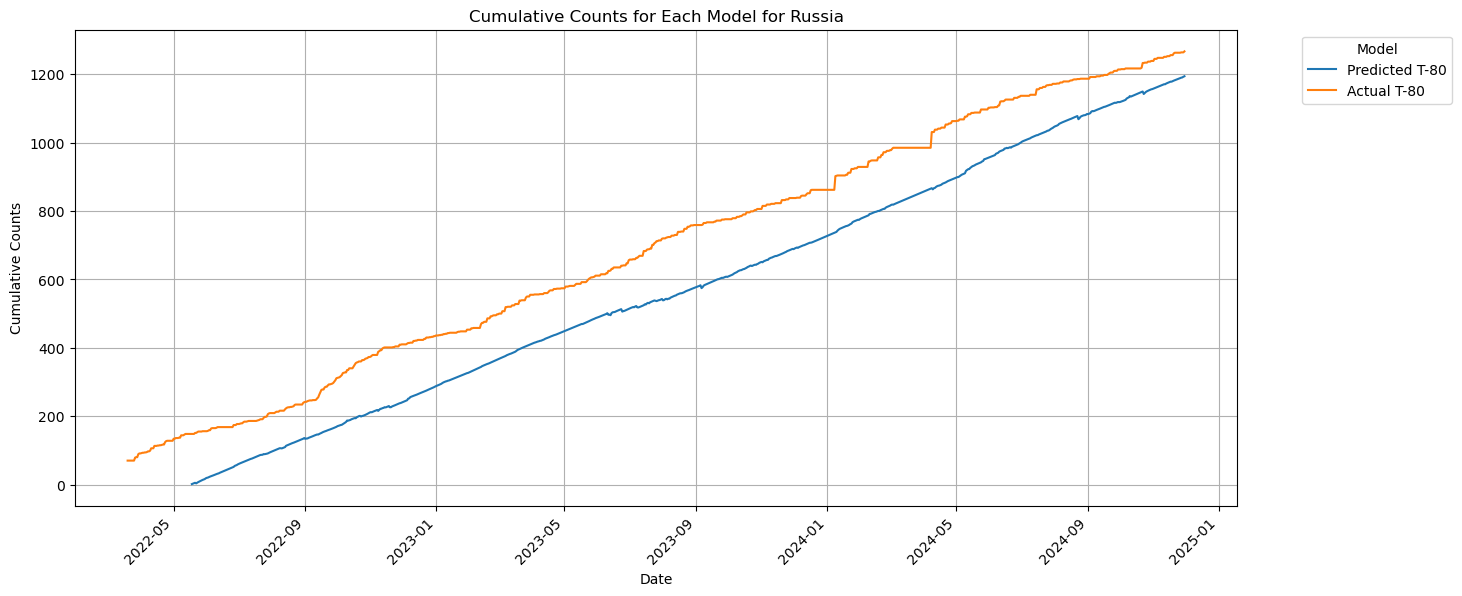

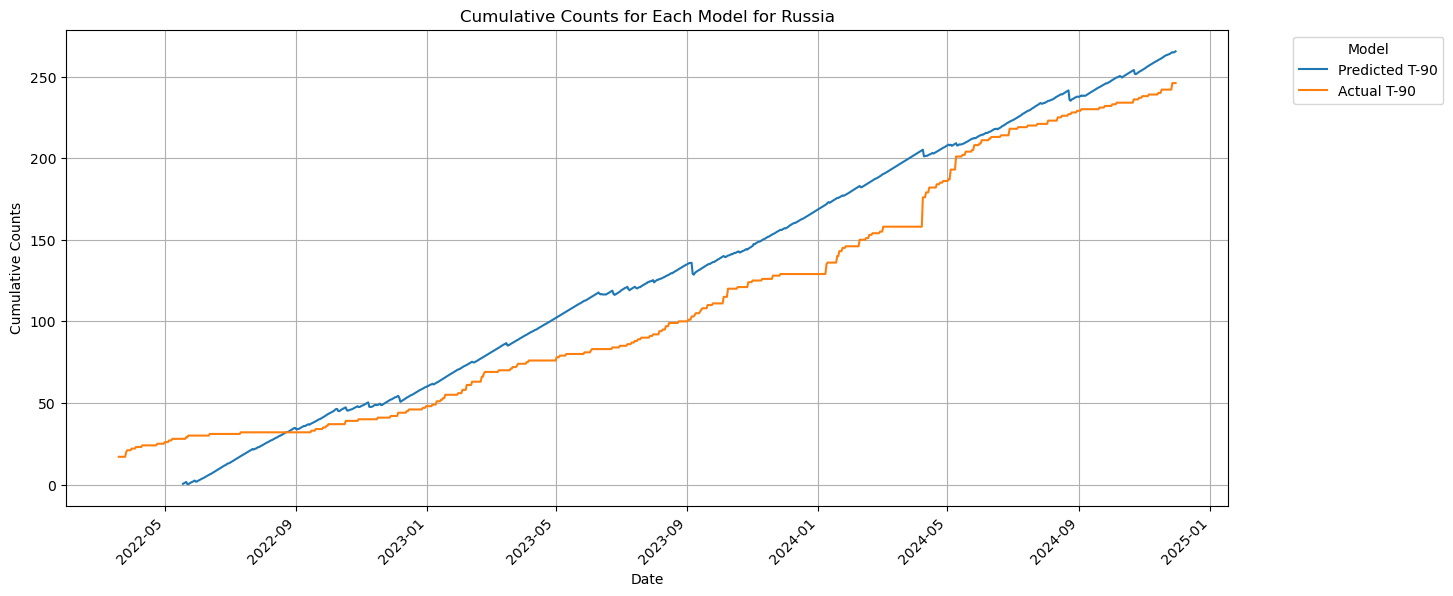

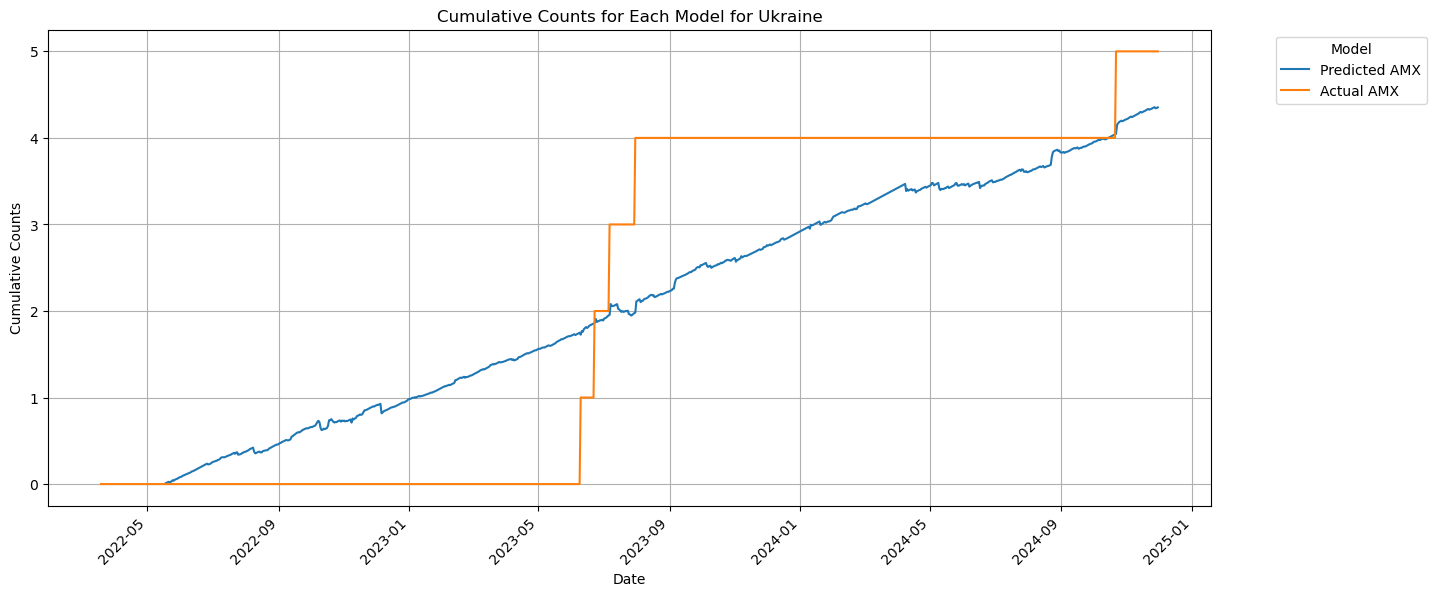

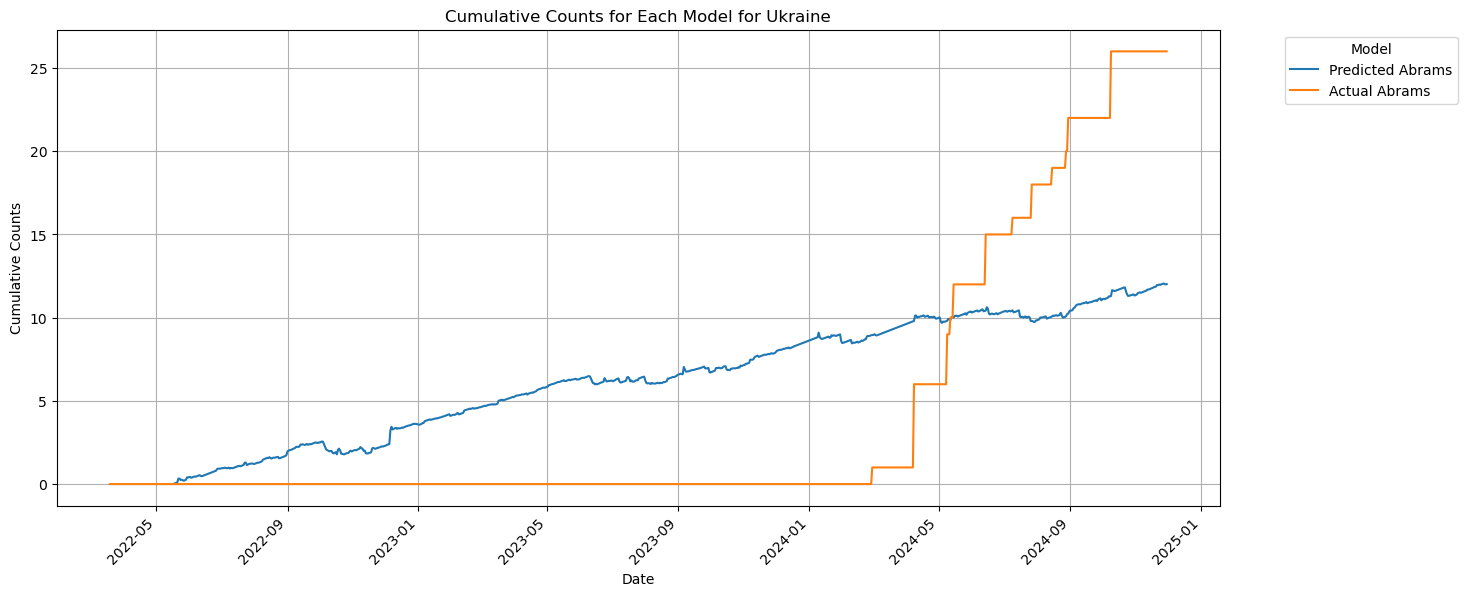

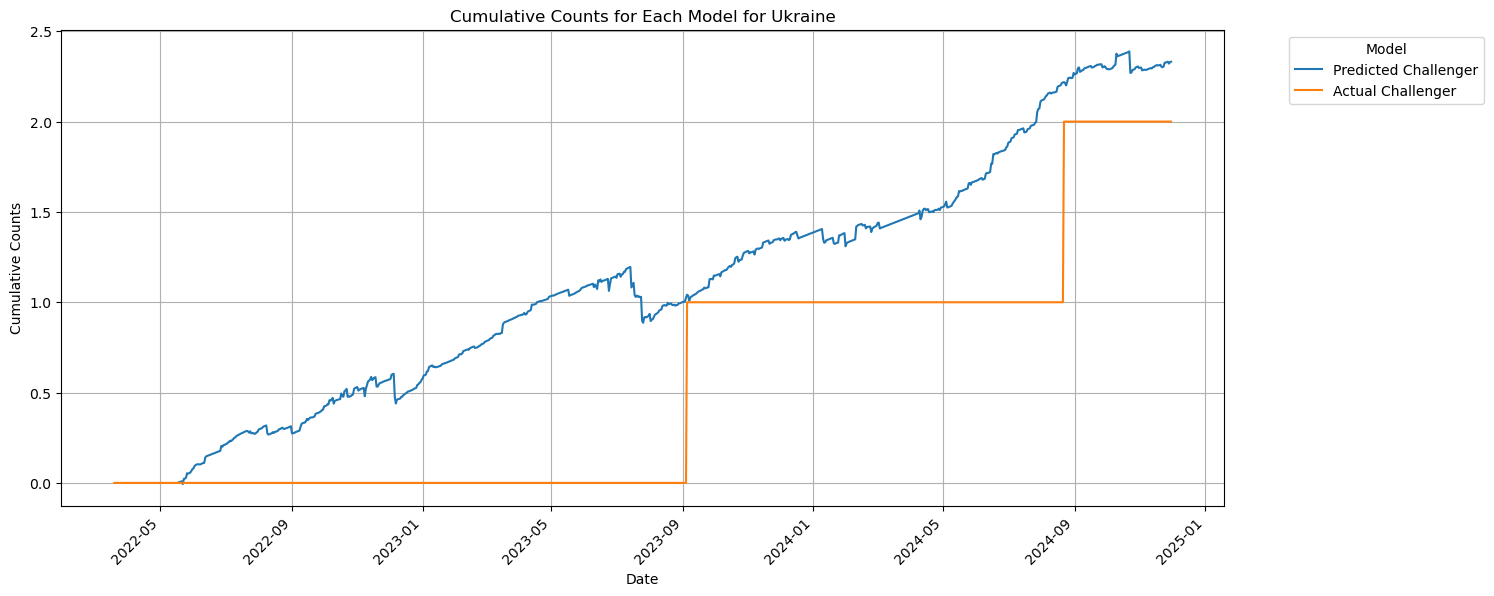

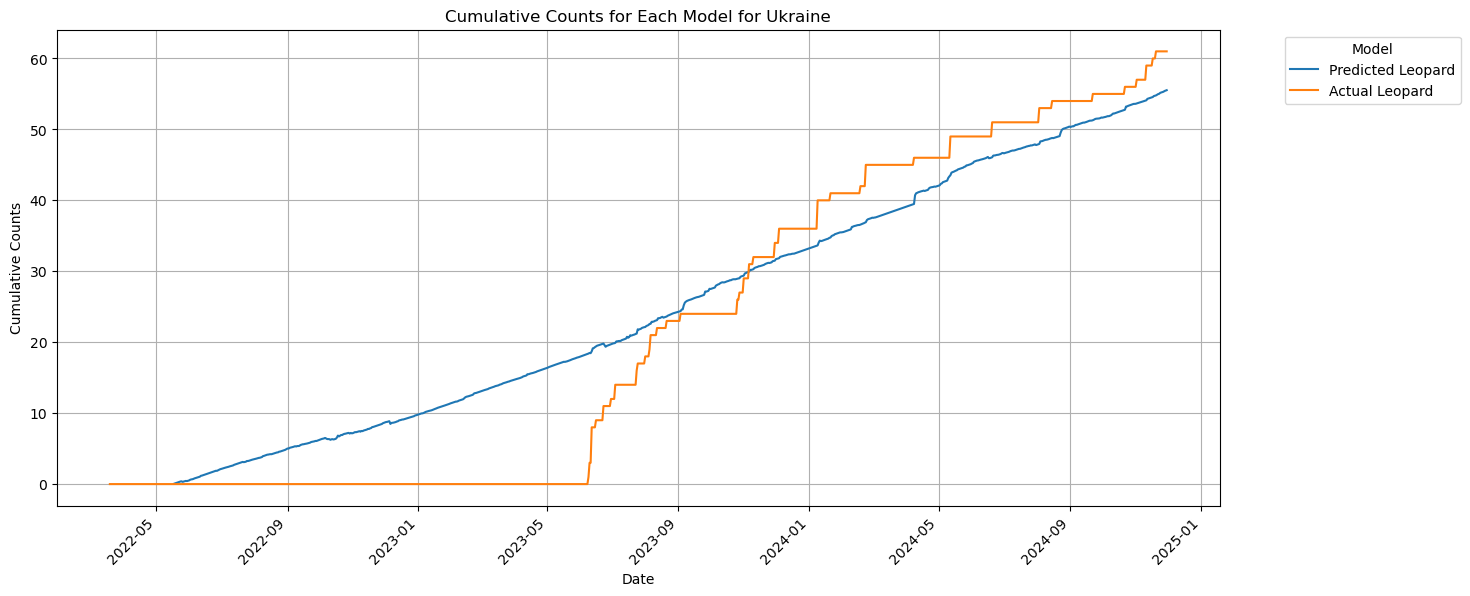

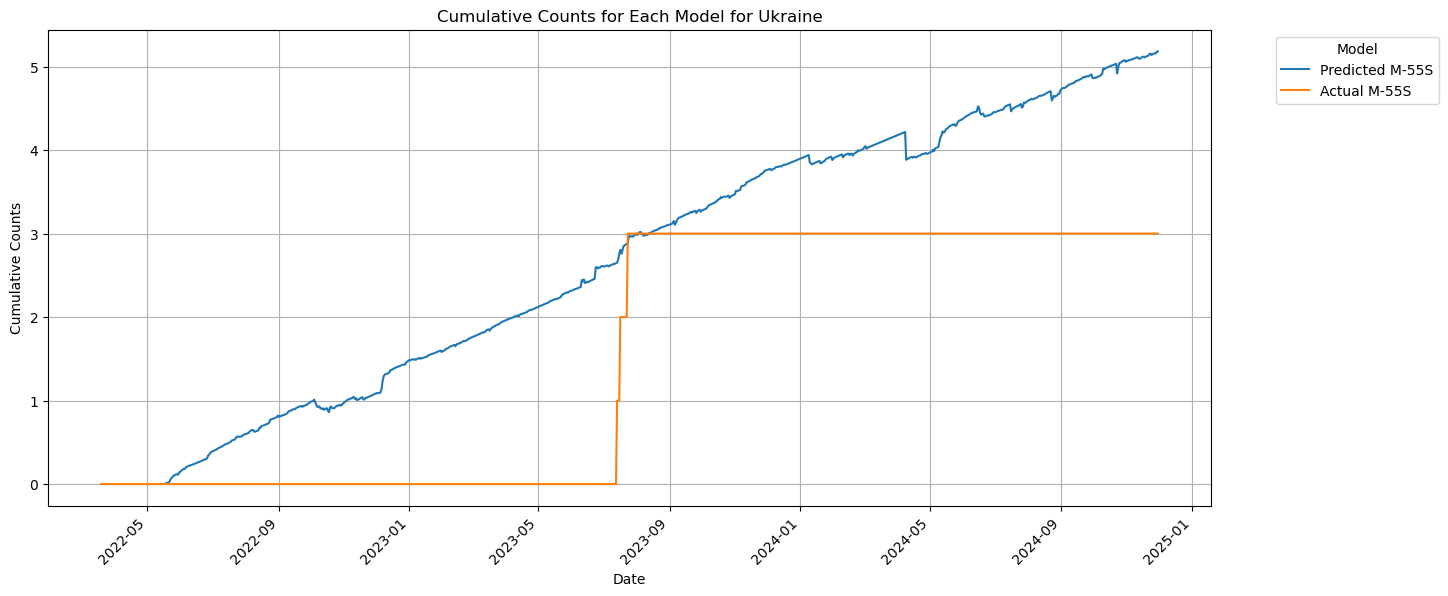

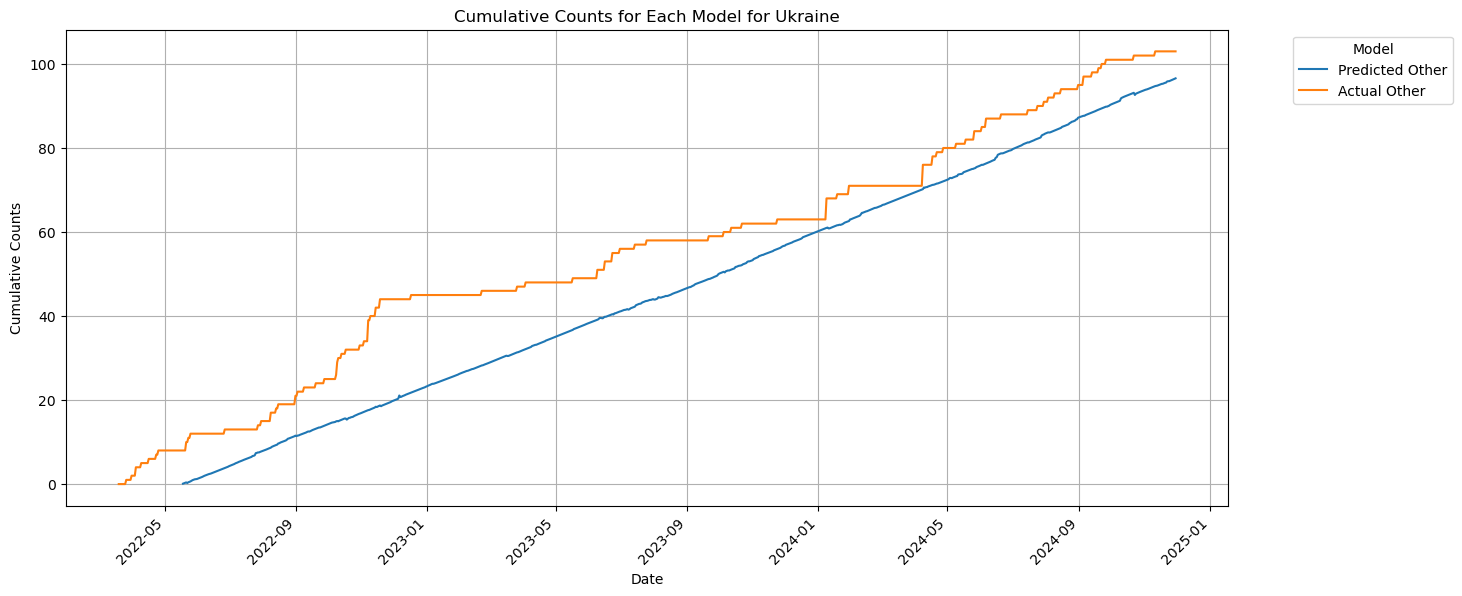

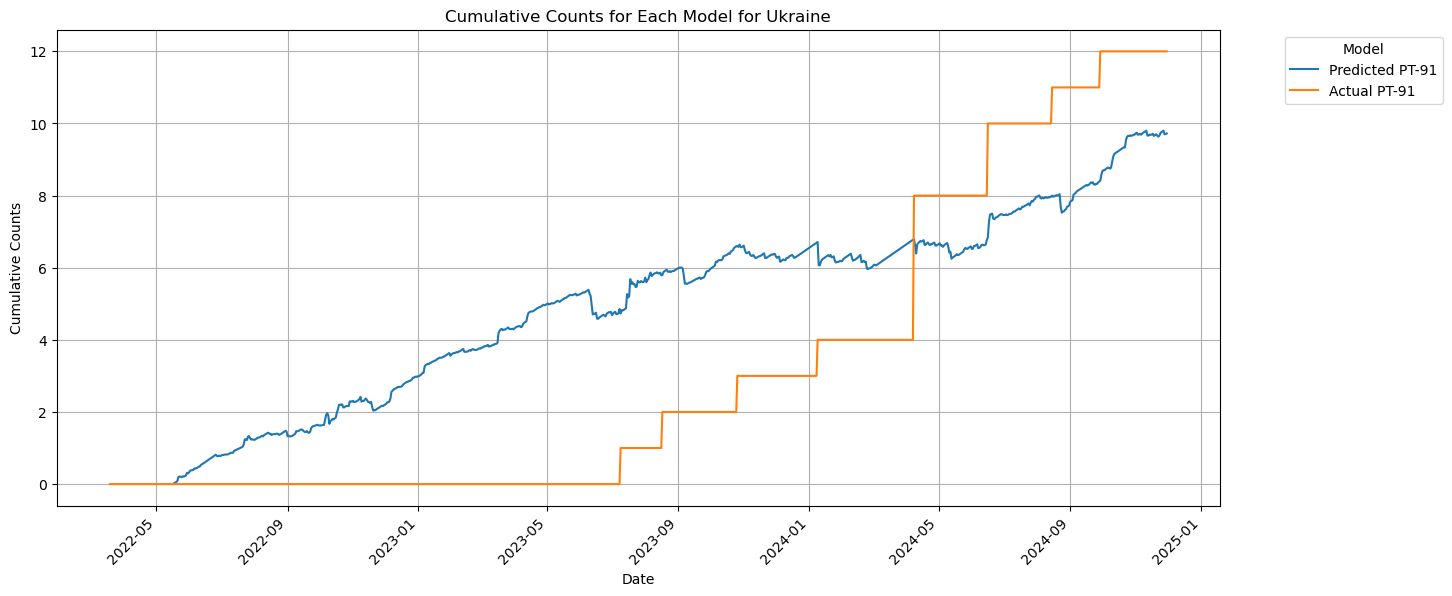

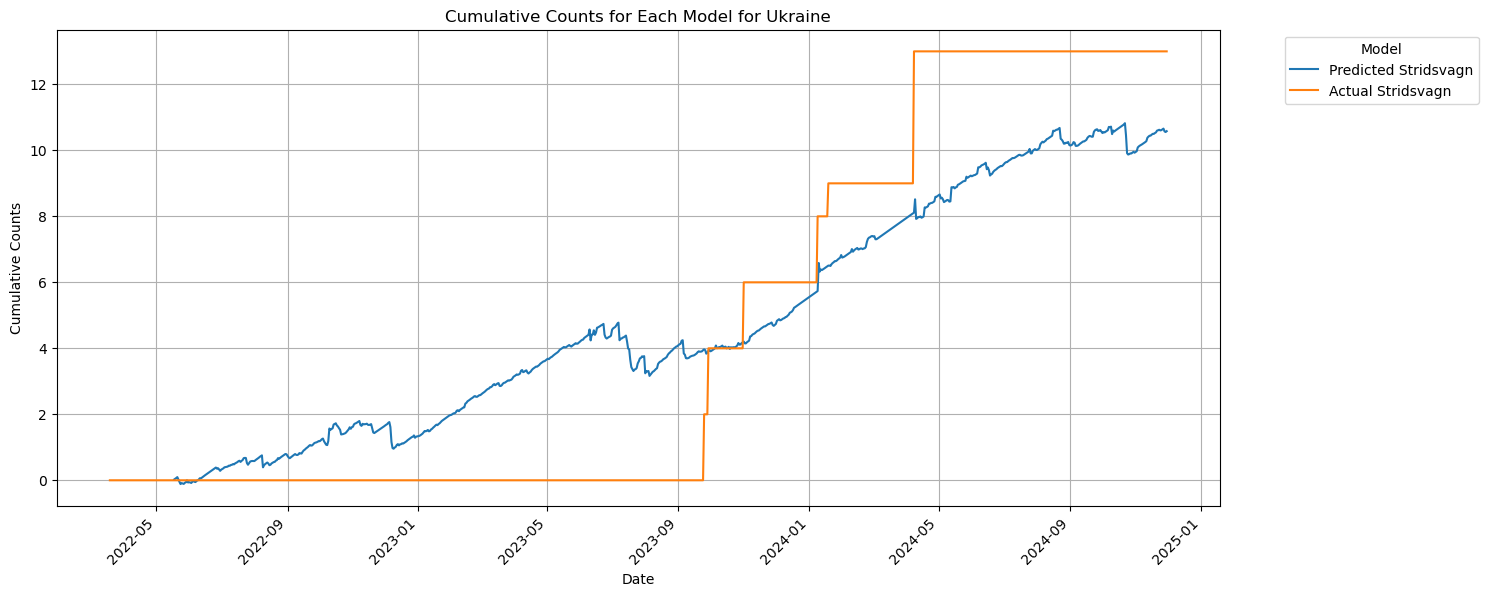

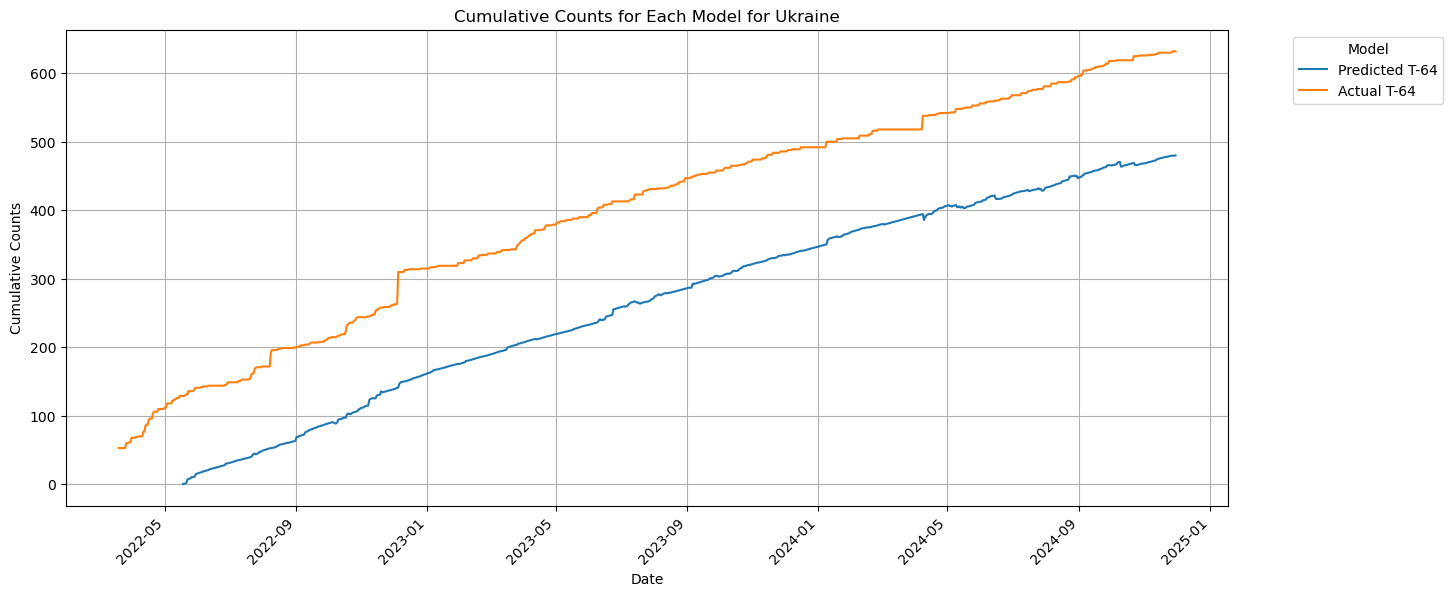

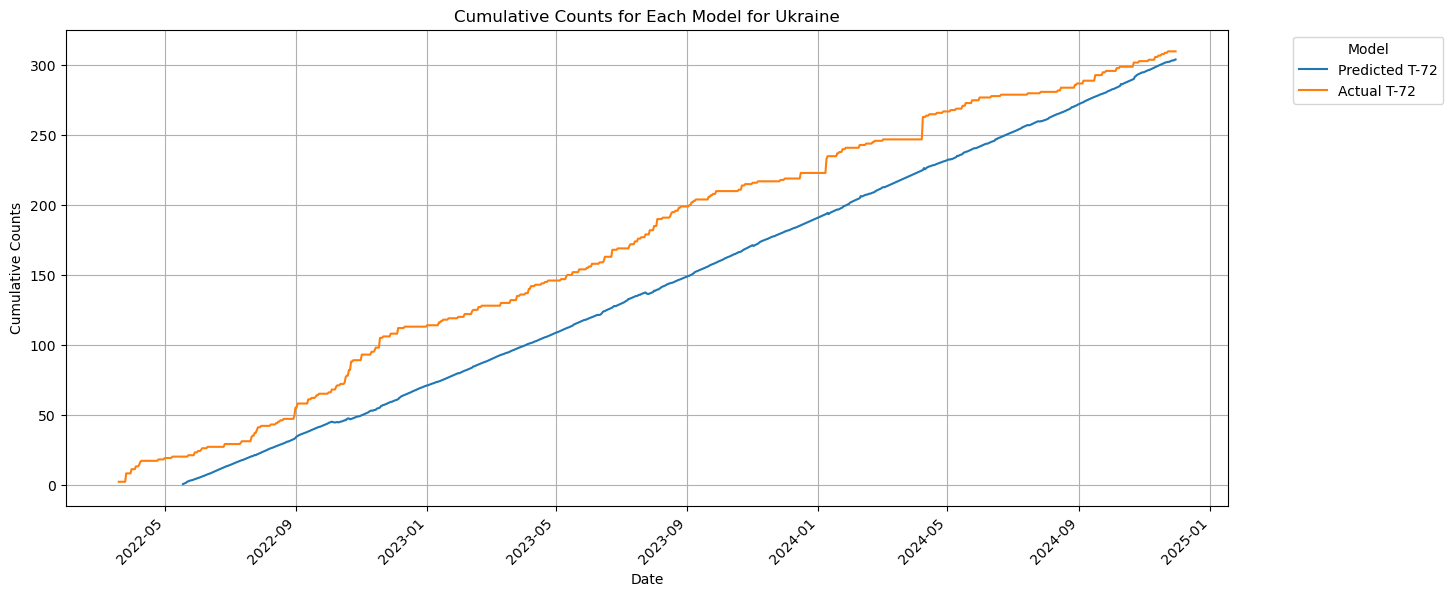

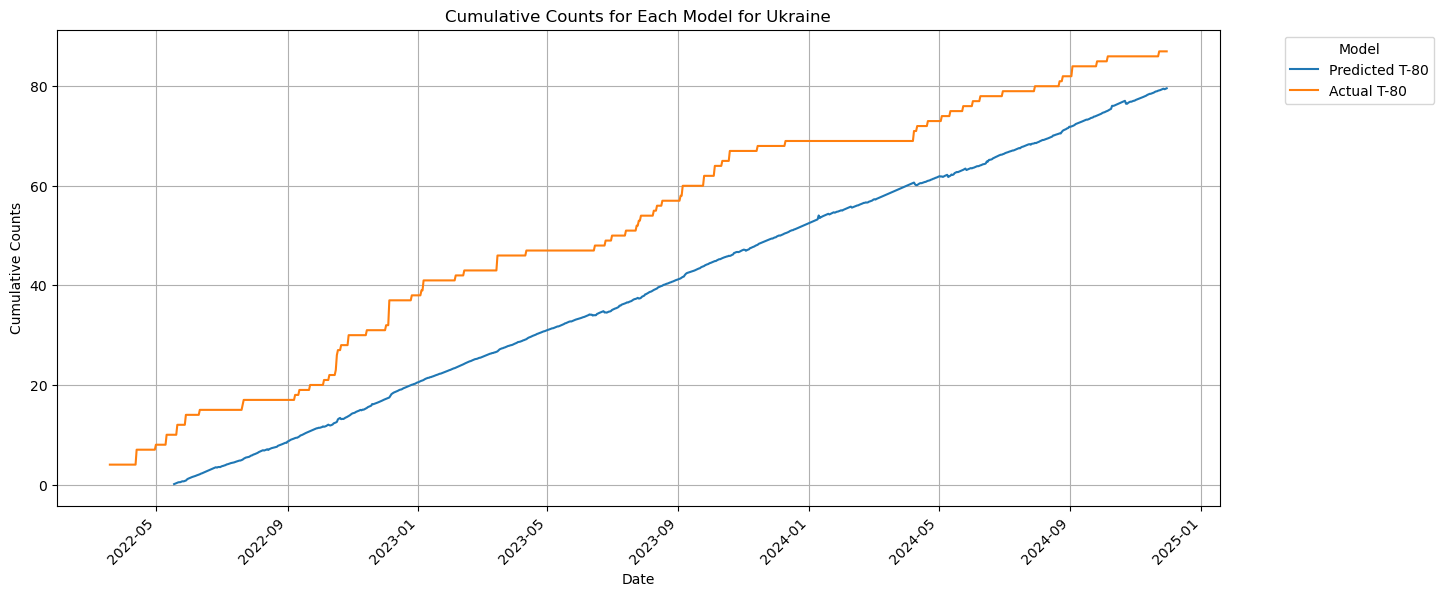

In [48]:
# Calculate cumulative counts for each model per country
cumulative_counts_by_model_country = predicted_data_df.cumsum()
cumulative_daily_counts = daily_counts.cumsum(axis=1)

for country, m in cumulative_counts_by_model_country.columns:
    plt.figure(figsize=(15, 7))
    plt.plot(cumulative_counts_by_model_country.index, cumulative_counts_by_model_country[(country, m)], label=f'Predicted {m}')
    cumulative_daily_counts.loc[(country, m)].plot(label=f'Actual {m}')
    
    plt.title('Cumulative Counts for Each Model for ' + country)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Counts')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

In [49]:
def predict_future(model, scaled_data, seq_length, future_steps):
    last_sequence = scaled_data[-seq_length:]
    future_predictions = []

    for _ in range(future_steps):
        # Reshape last sequence for prediction
        input_seq = last_sequence.reshape(1, seq_length, -1)
        next_step = model.predict(input_seq)[0]  # Predict next time step
        future_predictions.append(next_step)

        # Append the predicted step to the sequence and remove the oldest step
        last_sequence = np.vstack([last_sequence[1:], next_step])

    return np.array(future_predictions)

# Define future steps to predict
future_steps = 600
future_predictions = predict_future(model, scaled_data, seq_length, future_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━

In [50]:
# Rescale future predictions to original values
future_predictions_rescaled = scaler.inverse_transform(future_predictions)
future_dates = pd.date_range(start=daily_counts.columns[-1], periods=future_steps + 1, freq='D')[1:]
future_dates = pd.to_datetime(future_dates)
future_predictions_df = pd.DataFrame(future_predictions_rescaled.T, index=daily_counts.index, columns=future_dates).T
combined_predictions = pd.concat([daily_counts.T, future_predictions_df])

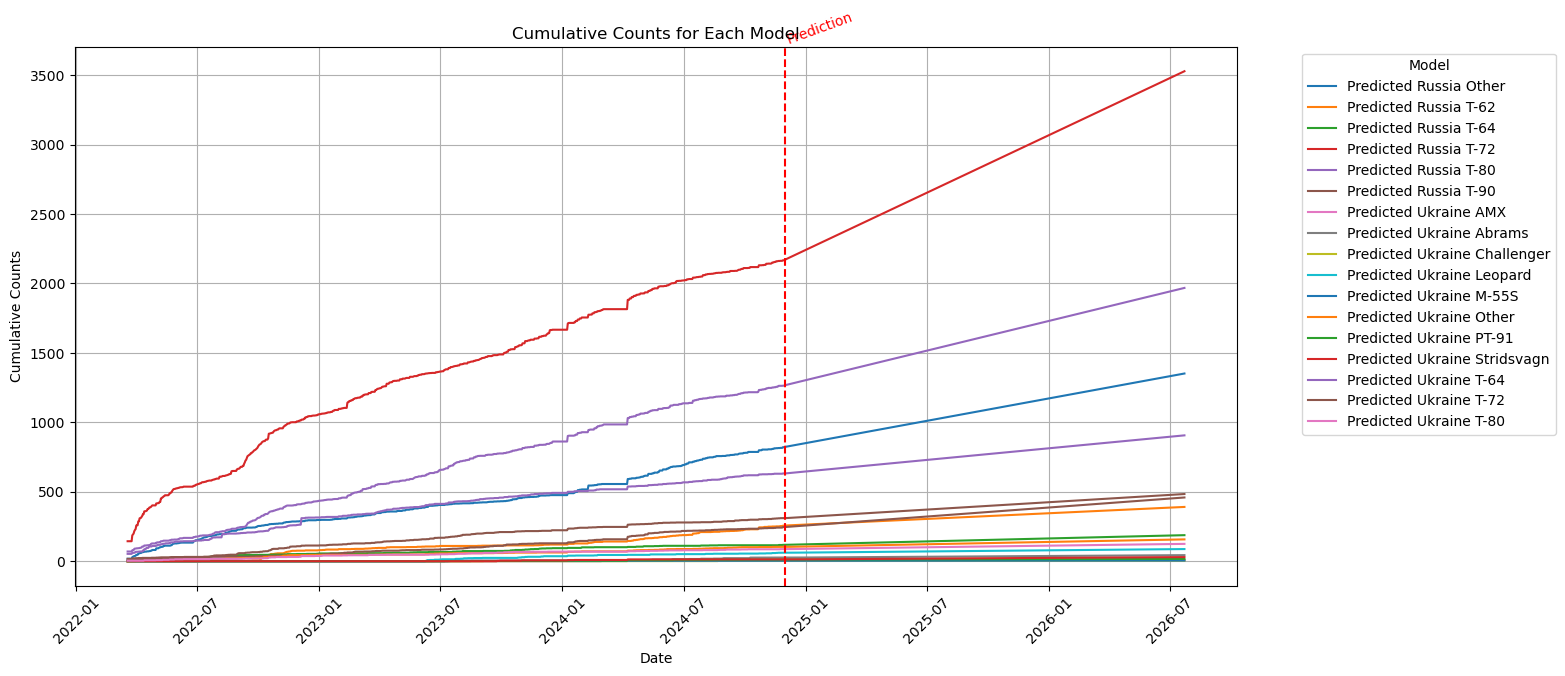

In [51]:
# Calculate cumulative counts for each model per country
cumulative_counts_by_model_country = combined_predictions.cumsum()

plt.figure(figsize=(15, 7))
# Plot the cumulative counts
for country, m in cumulative_counts_by_model_country.columns:
    plt.plot(cumulative_counts_by_model_country.index, cumulative_counts_by_model_country[(country, m)], label=f'Predicted {country} {m}')
    
plt.title('Cumulative Counts for Each Model')
plt.xlabel('Date')
plt.ylabel('Cumulative Counts')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

predicted_daily_counts

plt.axvline(last_date, color='red', linestyle='--')
plt.text(last_date, plt.ylim()[1], 'Prediction', rotation=20, verticalalignment='bottom', color='red')

plt.show()

In [52]:
# Resample the data to quarterly frequency and count the occurrences
quarterly_counts = tanks_df.groupby(['country', 'model', pd.Grouper(freq='Q')]).size().unstack(fill_value=0)
quarterly_counts

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/340967721.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = tanks_df.groupby(['country', 'model', pd.Grouper(freq='Q')]).size().unstack(fill_value=0)


date_recorded       2022-03-31  2022-06-30  2022-09-30  2022-12-31  \
country model                                                        
Russia  Other               39         112         101          45   
        T-62                 0           0           6          73   
        T-64                11          16          18          10   
        T-72               231         320         266         240   
        T-80                91          86         134         123   
        T-90                22           9           5          12   
Ukraine AMX                  0           0           0           0   
        Abrams               0           0           0           0   
        Challenger           0           0           0           0   
        Leopard              0           0           0           0   
        M-55S                0           0           0           0   
        Other                2          11          12          20   
        PT-91                0           0           0           0   
        Stridsvagn           0           0           0           0   
        T-64                68          81          63         103   
        T-72                11          18          36          48   
        T-80                 4          11           5          18   

date_recorded       2023-03-31  2023-06-30  2023-09-30  2023-12-31  \
country model                                                        
Russia  Other               50          58          27          44   
        T-62                17          12           5           7   
        T-64                 3           9           7          20   
        T-72               185         122         125         178   
        T-80               121         101         120          86   
        T-90                26          11          26          18   
Ukraine AMX                  0           2           2           0   
        Abrams               0           0           0           0   
        Challenger           0           0           1           0   
        Leopard              0          12          12          12   
        M-55S                0           0           3           0   
        Other                2           9           3           4   
        PT-91                0           0           2           1   
        Stridsvagn           0           0           4           2   
        T-64                41          57          45          34   
        T-72                23          33          41          13   
        T-80                 8           3          13           7   

date_recorded       2024-03-31  2024-06-30  2024-09-30  2024-12-31  
country model                                                       
Russia  Other               80         137          87          43  
        T-62                22          46          39          30  
        T-64                 7          10           4           3  
        T-72               148         207          89          59  
        T-80               123         152          77          53  
        T-90                29          60          14          14  
Ukraine AMX                  0           0           0           1  
        Abrams               1          14           7           4  
        Challenger           0           0           1           0  
        Leopard              9           6           4           6  
        M-55S                0           0           0           0  
        Other                8          17          13           2  
        PT-91                1           6           2           0  
        Stridsvagn           3           4           0           0  
        T-64                26          50          50          14  
        T-72                24          32          17          14  
        T-80                 0          10           6           2

/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/2875061975.py:2: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  quarterly_cumulative_predictions = combined_predictions.T.resample('Q', axis=1).sum()
/var/folders/r4/bh74c4454j99fj0pn7yj34hh0000gn/T/ipykernel_14145/2875061975.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_cumulative_predictions = combined_predictions.T.resample('Q', axis=1).sum()


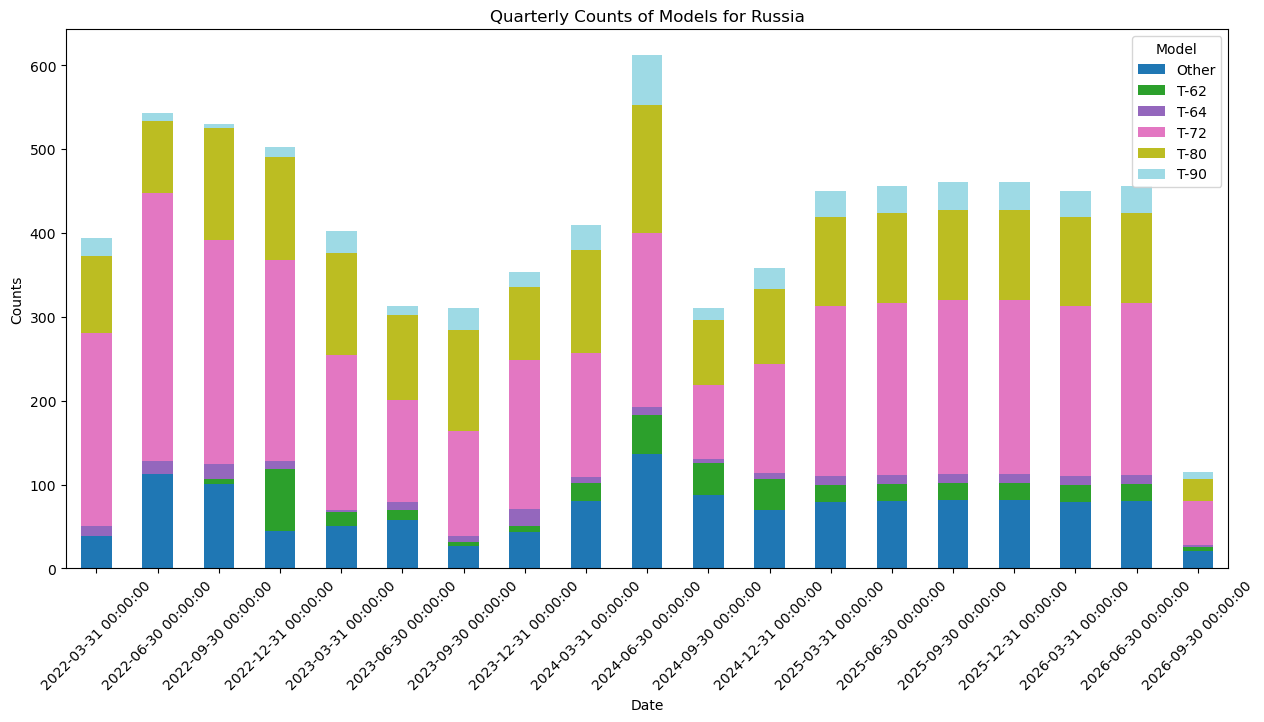

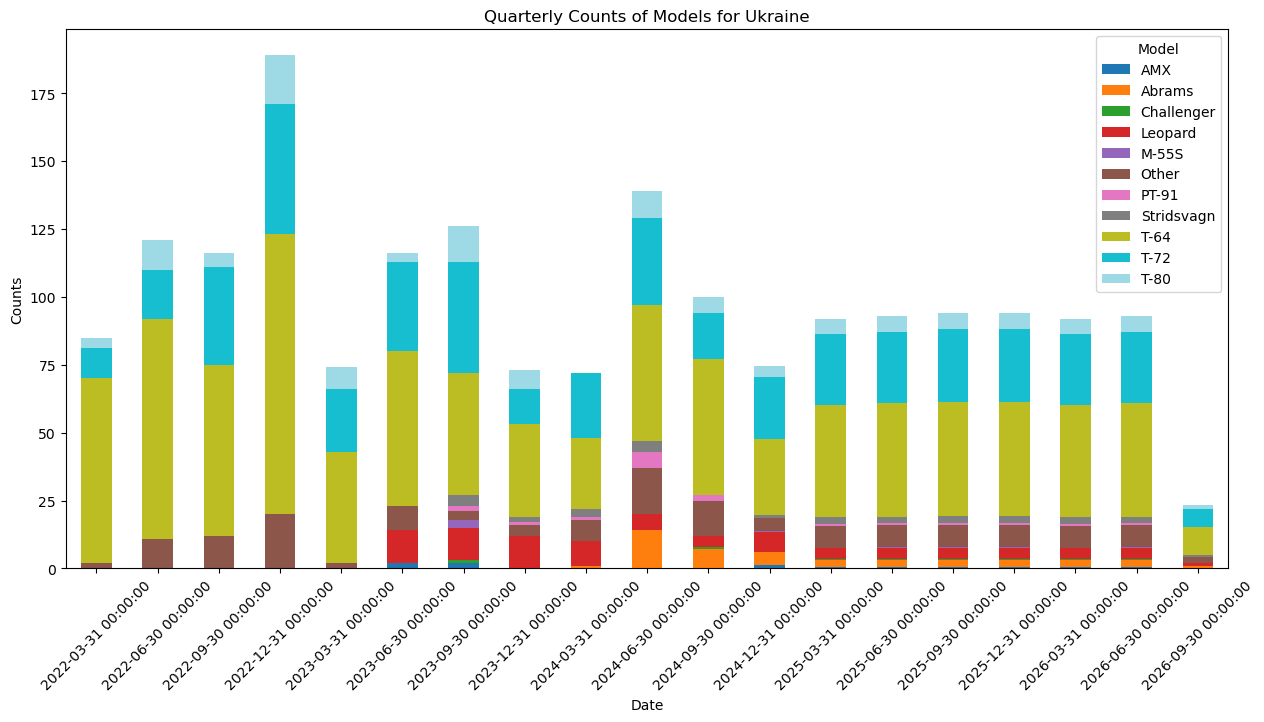

In [53]:
# Resample cumulative_predictions to quarterly frequency and sum the occurrences
quarterly_cumulative_predictions = combined_predictions.T.resample('Q', axis=1).sum()

# Plot the data per model per country by percentage
for country in ['Russia', 'Ukraine']:
    country_data = quarterly_cumulative_predictions.xs(country, level=0)
    country_data.T.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend(title='Model')
    plt.xticks(rotation=45)
    plt.show()

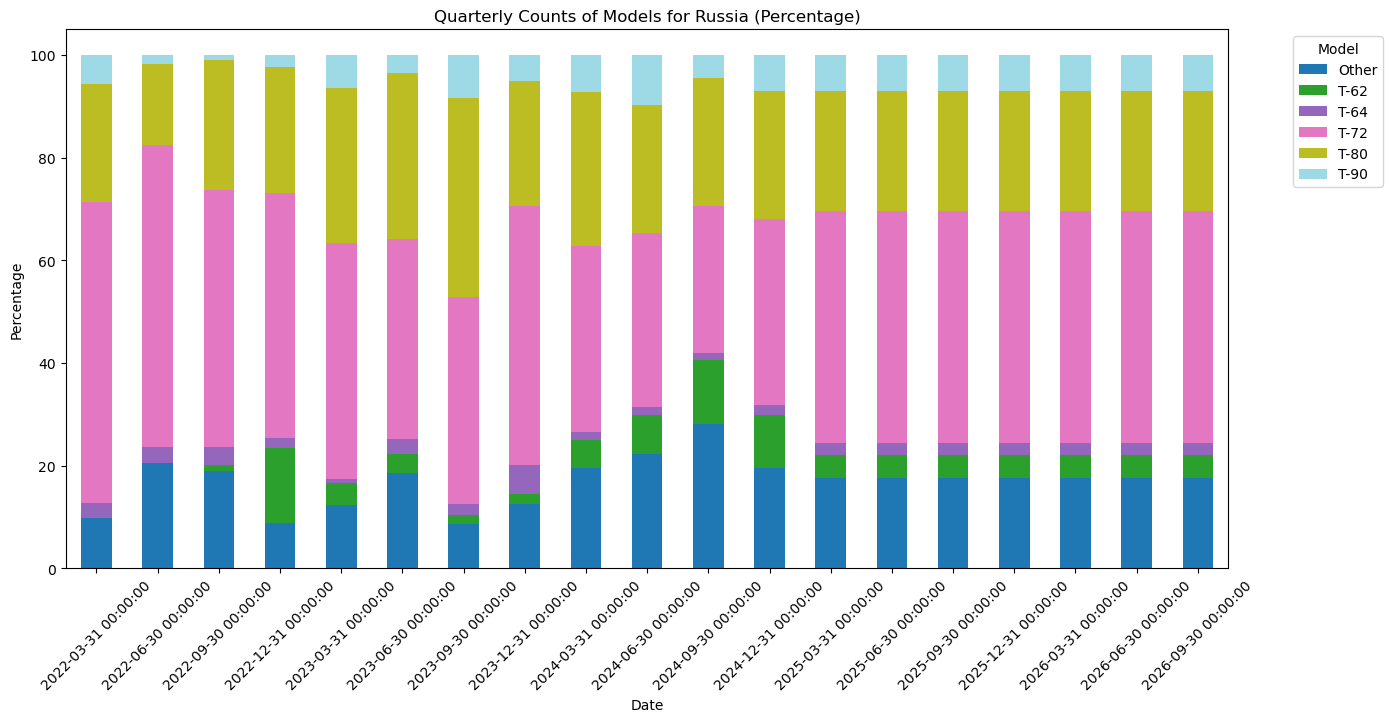

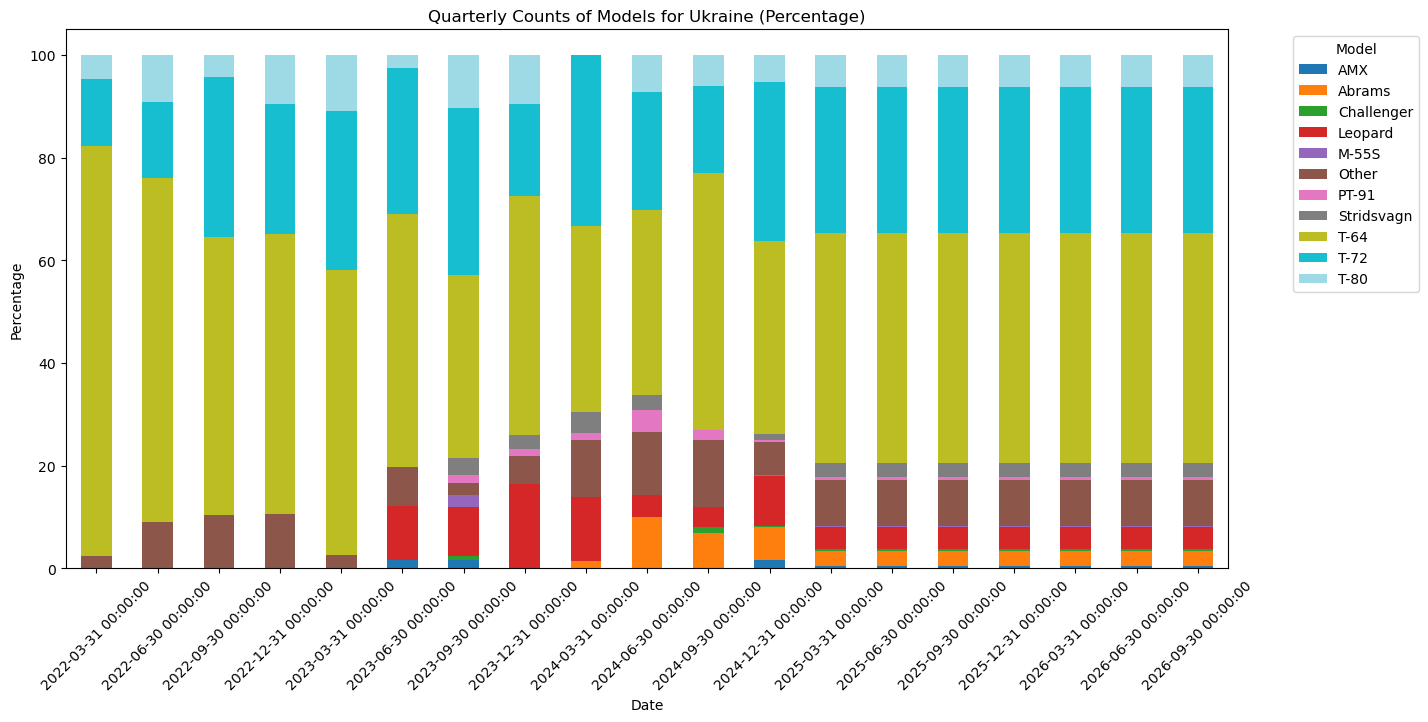

In [54]:
# Plot the data per model per country by percentage
for country in ['Russia', 'Ukraine']:
    country_data = quarterly_cumulative_predictions.xs(country, level=0).T
    country_data[country_data < 0] = 0
    country_data_percentage = country_data.div(country_data.sum(axis=1), axis=0).fillna(0) * 100
    country_data_percentage.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
    plt.title(f'Quarterly Counts of Models for {country} (Percentage)')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

Epoch 1/20


/opt/homebrew/anaconda3/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - loss: 1.9181 - val_loss: 1.0412
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 2.5407 - val_loss: 0.9442
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 2.1023 - val_loss: 0.9083
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 1.4048 - val_loss: 0.8877
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 1.9156 - val_loss: 0.8707
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 1.2335 - val_loss: 0.8635
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 1.1367 - val_loss: 0.8567
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 1.0105 - val_loss: 0.8572
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 2.3451 - val_loss: 0.8449
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 1.8078 - val_loss: 0.8413
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 2.9435 - val_loss: 0.8322
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 1.

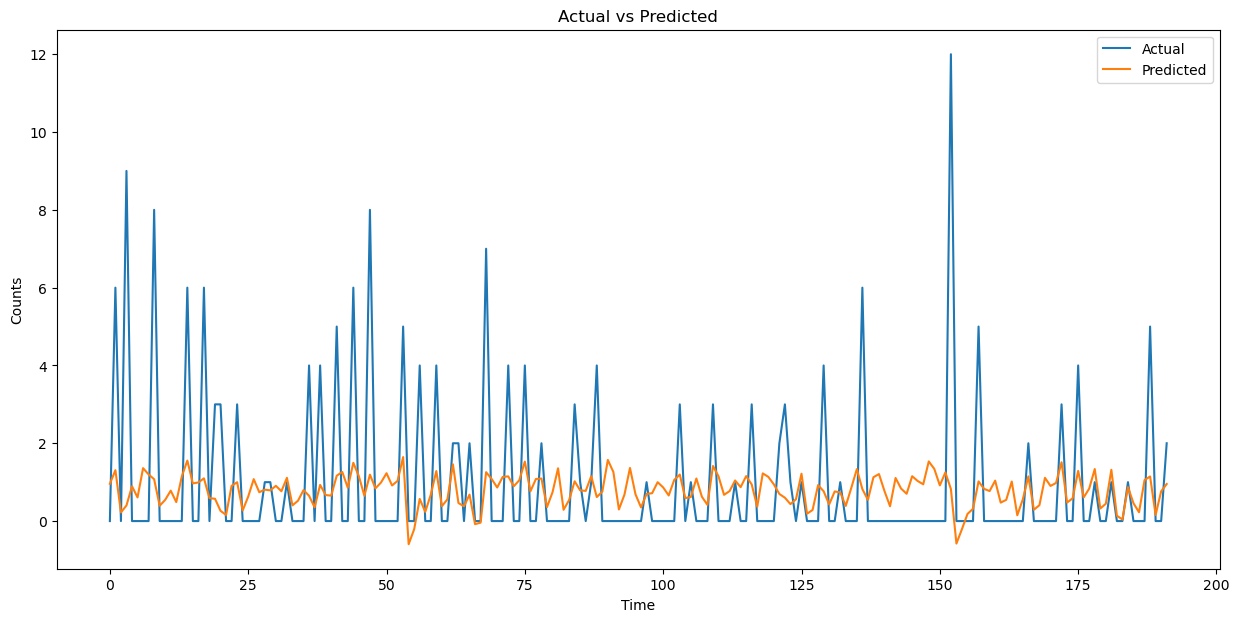

In [55]:
from sklearn.preprocessing import RobustScaler
data = daily_counts.T

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='tanh', input_shape=(seq_length, X.shape[2])),
    tf.keras.layers.Dense(X.shape[2])
])

model.compile(optimizer='adam', loss='mse')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(15, 7))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()